# **Теоретические основы радиально-базисных нейронных сетей**

## **1. Историческое развитие и математические основы**

### **1.1 Происхождение и эволюция**

Радиально-базисные нейронные сети (РБНС) появились в конце 1980-х годов как значимая альтернатива традиционным архитектурам нейронных сетей. Они были разработаны на основе математической теории интерполяции функций с использованием радиально-базисных функций, особенно в контексте аппроксимации разреженных данных. Фундаментальные работы Брумхеда и Лоу (1988), а также Муди и Даркена (1989) заложили основу для РБНС, предложив архитектуры нейронных сетей, которые использовали радиально-базисные функции в качестве функций активации в скрытом слое.

Развитие РБНС было обусловлено несколькими теоретическими преимуществами:
* Прочная математическая основа в теории аппроксимации
* Более быстрое обучение по сравнению с многослойными персептронами (МСП)
* Способность избегать проблем локальных минимумов, характерных для метода обратного распространения ошибки
* Интерпретируемые представления скрытого слоя

### **1.2 Математические основы**

РБНС базируются на математической теории аппроксимации, в частности, в контексте интерполяции функций. Теоретический фундамент опирается на теорему Ковера и свойство универсальной аппроксимации, которое утверждает, что любая непрерывная функция может быть аппроксимирована с произвольной точностью при достаточном количестве базисных функций.

Аппроксимация основана на принципе, что сложная функция может быть построена как линейная комбинация более простых функций (радиально-базисных функций), центрированных в различных точках входного пространства. Этот подход фундаментально отличается от стратегии глобальной аппроксимации, используемой в традиционных многослойных персептронах.

### **1.3 Основная структура**

Стандартная архитектура РБНС состоит из трех слоев:
1. **Входной слой**: Передает входные признаки непосредственно в скрытый слой без трансформации
2. **Скрытый слой**: Содержит нейроны с радиально-базисными функциями активации
3. **Выходной слой**: Выполняет взвешенную сумму выходов скрытых нейронов, обычно с линейной активацией

Математическое представление выхода РБНС для входного вектора x задается:

$$y(\mathbf{x}) = \sum_{i=1}^{N} w_i \cdot \phi(||\mathbf{x} - \mathbf{c}_i||) + b$$

где:

* $N$ - количество скрытых нейронов
* $w_i$ - выходные веса
* $\mathbf{c}_i$ - центры радиально-базисных функций
* $\phi(\cdot)$ - радиально-базисная функция
* $||\mathbf{x} - \mathbf{c}_i||$ - евклидово расстояние между входным вектором и центром
* $b$ - смещение (bias)


### **1.4 Функции активации**

Определяющей характеристикой РБНС является использование радиально-базисных функций в качестве функций активации. Эти функции формируют выходные значения, которые зависят только от расстояния между входным вектором и фиксированной точкой (центром).

#### **1.4.1 Основные радиально-базисные функции**

Наиболее распространенной функцией активации является **функция Гаусса**:

$$\phi(r) = \exp \left( -\frac{r^2}{2\sigma^2} \right)$$

где:
* $r = ||\mathbf{x} - \mathbf{c}||$ - расстояние от центра
* $\sigma$ - параметр ширины, контролирующий разброс функции

Классические радиально-базисные функции также включают:

* **Мультиквадратичная**: $$\phi(r) = \sqrt{r^2 + \sigma^2}$$
* **Обратная мультиквадратичная**: $$\phi(r) = \frac{1}{\sqrt{r^2+\sigma^2}}$$
* **Тонкопластинчатый сплайн**: $$\phi(r) = r^2 \log(r)$$

#### **1.4.2 Расширенный набор радиально-базисных функций**

В современных исследованиях и практических применениях используется более широкий спектр радиально-базисных функций, каждая из которых обладает уникальными свойствами:

**1. Линейная функция:**
$$\phi(r) = r$$
- Простейшая RBF функция
- Неограниченно возрастающая с увеличением расстояния
- Применяется в задачах, где требуется линейная интерполяция

**2. Гауссова функция:**
$$\phi(r) = \exp\left(-\frac{r^2}{2\sigma^2}\right)$$
- Наиболее популярная RBF функция
- Локализованная (быстро убывает с расстоянием)
- Гладкая и дифференцируемая

**3. Тонкопластинчатый сплайн (Thin-plate Spline):**
$$\phi(r) = r^2 \ln r$$
- Часто используется в задачах интерполяции
- Обеспечивает гладкие переходы между точками
- Популярна в компьютерной графике и обработке изображений

**4. Логистическая функция:**
$$\phi(r) = \frac{1}{1 + \exp\left(\frac{r^2}{\sigma^2}\right)}$$
- Ограниченная функция (значения от 0 до 1)
- Монотонно убывающая
- Подходит для задач классификации

**5. Hardy Multiquadric:**
$$\phi(r) = \frac{1}{(r^2 + \sigma^2)^\alpha}$$
- Обобщение обратной мультиквадратичной функции
- Параметр $\alpha$ контролирует скорость убывания
- Гибкая настройка под конкретные задачи

**6. Мультиквадратичная функция:**
$$\phi(r) = (r^2 + \sigma^2)^\beta$$
- Неограниченно возрастающая функция
- Параметр $\beta$ определяет степень роста
- Эффективна для аппроксимации глобальных трендов

**7. DSP Kernel:**
$$\phi(r) = \frac{1}{1 + \frac{r^2}{\sigma^2}}$$
- Применяется в цифровой обработке сигналов
- Монотонно убывающая функция
- Хорошие свойства сглаживания

**8. Предложенная квадратичная функция:**
$$\phi(r) = \max\left(0, 1 - \frac{r^2}{\sigma^2}\right)$$
- Компактная поддержка (равна нулю вне определенного радиуса)
- Вычислительно эффективная
- Подходит для локальной аппроксимации

#### **1.4.3 Выбор функции активации**

Выбор конкретной радиально-базисной функции зависит от:

- **Характера данных**: гладкие функции для непрерывных данных, компактные для локальных особенностей
- **Требований к вычислительной эффективности**: простые функции для быстрых вычислений
- **Необходимости глобальной или локальной аппроксимации**: глобальные функции для общих трендов, локальные для детализации
- **Свойств сходимости**: некоторые функции обеспечивают лучшую сходимость алгоритмов обучения

Каждая функция имеет свои преимущества и области применения, что делает РБНС гибким инструментом для решения широкого спектра задач машинного обучения.

Недавние исследования Чжао и др. (2019) были посвящены полностью обучаемым базисным функциям активации, позволяющим сетям адаптировать свою нелинейность в процессе обучения для улучшения производительности ([DeepLABNet](https://www.alphaxiv.org/abs/1911.09257)).

## **2. Сети РБФ в сравнении с другими архитектурами нейронных сетей**

### **2.1 Сравнение с многослойными персептронами (МСП)**

РБНС фундаментально отличаются от МСП по нескольким ключевым аспектам:

| Характеристика | РБНС | МСП |
|----------------|------|-----|
| Функции активации | Радиальные (основанные на расстоянии) | Сигмоидальные/ReLU (основанные на скалярном произведении) |
| Стратегия аппроксимации | Локальная (каждый нейрон реагирует на область) | Глобальная (распределенное представление) |
| Метод обучения | Часто двухэтапный (без учителя + с учителем) | Обычно сквозное обучение с учителем |
| Скрытые слои | Обычно один скрытый слой | Множественные скрытые слои |
| Скорость обучения | Как правило, быстрее | В целом медленнее, склонность к локальным минимумам |
| Интерпретируемость | Выше (центры являются прототипами) | Ниже (распределенные представления) |

Ключевое концептуальное различие заключается в способе разделения входного пространства. МСП строят сложные границы решений через иерархические преобразования признаков, в то время как РБНС используют набор локализованных рецептивных полей, создающих области активации вокруг прототипных точек.


### **2.2 Сравнение с сетями Кохонена**

Сети Кохонена (самоорганизующиеся карты или SOM) имеют некоторые сходства с фазой выбора центров РБНС, но существенно отличаются по назначению и структуре:

| Характеристика | РБНС | Сети Кохонена (SOM) |
|----------------|------|---------------------|
| Основное назначение | Аппроксимация функций/классификация | Снижение размерности/кластеризация |
| Выходной слой | Линейная комбинация активаций | Обычно отсутствует (визуализация) |
| Обучение | С учителем (после размещения центров) | Без учителя |
| Функция окрестности | Отсутствует | Критически важна для сохранения топологии |
| Результат | Отображение "вход-выход" | Топологическая карта входного пространства |

Хотя обе сети используют прототипные векторы (центры в РБНС и весовые векторы в SOM), сети Кохонена фокусируются на сохранении топологических свойств входного пространства, в то время как РБНС используют прототипы для построения аппроксимации функции.

### **2.3 Сравнение с современными глубокими сетями**

С развитием глубокого обучения важно понимать, как РБНС соотносятся с современными архитектурами:

| Характеристика | РБНС | Современные глубокие сети |
|----------------|------|---------------------------|
| Глубина | Неглубокие (обычно 3 слоя) | Глубокие (много слоев) |
| Эффективность параметров | Ниже для высокоразмерных данных | Выше благодаря иерархическим признакам |
| Требования к данным | Могут работать с ограниченными данными | Обычно требуют большие наборы данных |
| Сложность обучения | Проще, часто частично аналитическое | Сложное, сквозное на основе градиентов |
| Интерпретируемость | Выше | Ниже |
| Масштабируемость | Проблематично для очень больших наборов данных | Лучше подходят для крупномасштабных задач |

Недавняя работа Менга и др. (2021) попыталась преодолеть этот разрыв путем интеграции компонентов РБФ с сверточными нейронными сетями для улучшения интерпретируемости при сохранении производительности ([RBF-CNN](https://www.alphaxiv.org/abs/2208.11401)).

## **3. Методологии обучения**

Обучение РБНС обычно включает два основных этапа:

### **3.1 Выбор центров**

Существуют три основных подхода к определению центров нейронов РБФ:

1. **Случайный выбор**: Центры случайно выбираются из обучающих данных
2. **Выбор на основе кластеризации**: Центры определяются с помощью алгоритмов кластеризации (например, K-средних) для идентификации прототипических точек во входном пространстве
3. **Выбор с учителем**: Центры изучаются посредством оптимизации на основе градиентного спуска

### **3.2 Определение ширины**

Параметр ширины $\sigma$ значительно влияет на способность сети к обобщению:

1. **Фиксированная ширина**: Все нейроны используют одну и ту же предопределенную ширину
2. **P-ближайший сосед**: Ширина определяется на основе среднего расстояния до p-ближайших центров
3. **Адаптивная ширина**: Каждый нейрон имеет собственный параметр ширины, оптимизируемый во время обучения

### **3.3 Оптимизация выходных весов**
После фиксации центров и ширин выходные веса могут быть оптимизированы с использованием:

1. **Решение в замкнутой форме**: Использование псевдообратной матрицы (оптимально в смысле наименьших квадратов)

  $$W = \Phi^{\dagger}TW = \Phi^+T$$

  где $\Phi$ — матрица выходов скрытого слоя, а $T$ — целевая матрица.

2. **Градиентный спуск**: Для онлайн-обучения или когда решение в замкнутой форме вычислительно затратно
3. **Регуляризованный метод наименьших квадратов**: Для улучшения обобщения

### **3.4 Сквозное обучение**

Недавние подходы перешли к сквозному обучению всех параметров одновременно. Согласно исследованию Чжао и др. (2019), их архитектура DeepLABNet позволяет обучать РБНС на основе градиентного спуска с полностью обучаемыми базисными функциями, обеспечивая интеграцию с современными фреймворками глубокого обучения ([DeepLABNet](https://www.alphaxiv.org/abs/1911.09257)).

## **4. Практические применения**

РБНС нашли применение в многочисленных областях благодаря их эффективному обучению и сильным аппроксимационным возможностям:

### **4.1 Аппроксимация функций и регрессия**

РБНС превосходно справляются с аппроксимацией сложных нелинейных функций, что делает их подходящими для:

* Идентификации систем в теории управления
* Прогнозирования временных рядов в финансах и экономике
* Суррогатного моделирования в инженерной оптимизации

### **4.2 Распознавание образов и классификация**

Их локализованная природа делает РБНС эффективными для задач классификации:

* Распознавание рукописных символов
* Распознавание лиц и биометрия
* Обнаружение аномалий в различных областях

### **4.3 Анализ временных рядов**

Недавняя работа Лю и др. (2024) демонстрирует эффективность РБНС в заполнении пропусков во временных рядах, где они моделируют локальные временные зависимости и надежно обрабатывают паттерны отсутствующих данных [Заполнение пропусков во временных рядах с помощью РБНС](https://www.alphaxiv.org/abs/2407.17040).

### **4.4 Обработка сигналов**

РБНС используются в различных приложениях обработки сигналов:

* Шумоподавление
* Эквализация каналов в коммуникациях
* Интерполяция и реконструкция сигналов

### **4.5 Системы управления**

Быстрое обучение и надежная производительность РБНС делают их ценными в приложениях управления:

* Адаптивное управление
* Планирование траекторий для роботов
* Управление процессами в промышленных условиях

# **5. Сильные стороны и ограничения**

## **5.1 Сильные стороны**

1. **Сильный теоретический фундамент**: Основан на теории аппроксимации с гарантированными свойствами
2. **Быстрое обучение**: Часто быстрее методов, основанных на обратном распространении ошибки, особенно для задач среднего размера
3. **Локальная аппроксимация**: Эффективен при захвате локальных паттернов и обработке нестационарных данных
4. **Интерпретируемость**: Центры могут быть интерпретированы как прототипические примеры из обучающих данных
5. **Избегает локальных минимумов**: Двухэтапный подход к обучению снижает риск субоптимальных решений
6. **Хорошо работает с ограниченными данными**: Может достичь хорошей обобщающей способности с меньшими наборами данных

## **5.2 Ограничения**

1. **Проклятие размерности**: С увеличением размерности входных данных число необходимых RBF-единиц растет экспоненциально
2. **Требования к памяти**: Хранение всех центров и вычисление расстояний может быть ресурсоемким
3. **Проблема выбора центров**: Выбор подходящих центров критически важен, но сложен
4. **Меньшая эффективность параметров**: По сравнению с глубокими сетями для высокоразмерных задач
5. **Интеграция с современными фреймворками**: Традиционные RBFNN не естественно вписываются в конвейеры глубокого обучения

## **5.3 Сравнение с глубокими нейронными сетями**

| Аспект | RBFNN | Глубокие нейронные сети |
|--------|-------|-------------------------|
| Требования к обучающим данным | Могут хорошо работать с меньшим объемом данных | Обычно требуют большие наборы данных |
| Время обучения | В целом быстрее | Обычно дольше из-за большого числа параметров |
| Интерпретируемость | Более интерпретируемы (центры как прототипы) | Часто рассматриваются как "черные ящики" |
| Масштабируемость для сложных задач | Ограничена взрывным ростом числа центров | Лучше подходят благодаря иерархическому обучению |
| Трансферное обучение | Ограниченные возможности | Сильные возможности трансферного обучения |
| Обработка высокоразмерных данных | Сложно без снижения размерности | Более эффективны благодаря иерархическому извлечению признаков |

# **6. Недавние достижения и будущие направления**

Недавние исследования сосредоточены на решении традиционных ограничений RBFNN и их интеграции с современными подходами глубокого обучения:

## **6.1 Интеграция с глубоким обучением**

Исследователи изучают способы включения RBF-слоев в глубокие архитектуры:

* RBF-компоненты в CNN для улучшения интерпретируемости ([Meng et al. 2021](https://alphaxiv.org/abs/2208.11401))
* Полносвязные обучаемые RBF-сети с изучаемыми функциями активации ([Zhao et al. 2019](https://alphaxiv.org/abs/1911.09257))

## **6.2 Гибридные модели**

Комбинирование RBFNN с другими типами нейронных сетей:

* RBF-CNN гибриды для классификации изображений
* RBF-LSTM комбинации для моделирования временных последовательностей
* RBF-компоненты поверх извлекателей признаков

## **6.3 Квантовые RBFNN**

Принципы квантовых вычислений применяются к RBFNN:

* Квантово-вдохновленные RBFNN для классификации данных ([Tang et al. 2019](https://alphaxiv.org/abs/1910.08798))
* Потенциальные ускорения для высокоразмерных задач

## **6.4 Продвинутые приложения**

Продолжают появляться новые приложения:

* Восстановление пропущенных значений временных рядов с помощью многомерных RBFNN ([Liu et al. 2024](https://alphaxiv.org/abs/2407.17040))
* Реализации для периферийных вычислений в IoT-приложениях
* Специализированные приложения для финансового моделирования

# **Заключение**

Радиальные базисные функциональные нейронные сети представляют теоретически обоснованный подход к проектированию нейронных сетей с уникальными свойствами, которые продолжают делать их актуальными в ландшафте машинного обучения. Хотя традиционные RBFNN сталкивались с проблемами, связанными с масштабируемостью и интеграцией с современными фреймворками, недавние достижения в обучаемых функциях активации, гибридных архитектурах и новых приложениях возродили исследовательский интерес.

# **Источники**
1. Broomhead, D. S., & Lowe, D. (1988). Multivariable functional interpolation and adaptive networks. Complex Systems, 2, 321-355.

2. Moody, J., & Darken, C. J. (1989). Fast learning in networks of locally-tuned processing units. Neural Computation, 1(2), 281-294.

3. Meng, Y., et al. (2021). Radial Basis Function Networks for Convolutional Neural Networks to Learn Similarity Distance Metric and Improve Interpretability. arXiv:2208.11401

4. Zhao, M., et al. (2019). DeepLABNet: End-to-end Learning of Deep Radial Basis Networks with Fully Learnable Basis Functions. arXiv:1911.09257

5. Tang, M., et al. (2019). Data classification by quantum radial basis function networks. arXiv:1910.08798

6. Liu, X., et al. (2024). Time Series Imputation with Multivariate Radial Basis Function Neural Network. arXiv:2407.17040

7. Orr, M. J. L. (1996). Introduction to radial basis function networks. Technical Report, Centre for Cognitive Science, University of Edinburgh.

8. Haykin, S. (2009). Neural networks and learning machines (3rd ed.). Pearson.

# Реализация RBFN + эксперименты

In [107]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans
from IPython.display import HTML
from matplotlib import animation

## Класс с реализацией RBFN

In [171]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import HTML
from matplotlib import animation

class RBFNetwork:
    def __init__(self, n_centers, sigma=1.0, learning_rate=0.01, max_epochs=100, rbf_type='gaussian',
             alpha=0.5, beta=0.5, animation_interval=5, marker_size=80):
        """
        Инициализация радиально-базисной сети

        Параметры:
        - n_centers: количество центров (нейронов скрытого слоя)
        - sigma: ширина радиальных функций
        - learning_rate: скорость обучения
        - max_epochs: максимальное число эпох обучения
        - rbf_type: тип радиальной базисной функции ('gaussian', 'linear', 'thin_plate_spline',
                    'logistic', 'hardy_multiquadric', 'multiquadric', 'dsp_kernel', 'proposed_quadratic')
        - alpha: параметр для функций, требующих alpha (по умолчанию 0.5)
        - beta: параметр для функций, требующих beta (по умолчанию 0.5)
        - animation_interval: интервал записи кадров для анимации (каждая N-я эпоха)
        - marker_size: размер маркеров центров на графике
        """
        self.n_centers = n_centers
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.rbf_type = rbf_type
        self.alpha = alpha
        self.beta = beta
        self.animation_interval = animation_interval
        self.marker_size = marker_size
        self.centers = None
        self.weights = None
        self.training_history = []

        # Проверка допустимого типа RBF
        self._available_rbf_types = ['gaussian', 'linear', 'thin_plate_spline', 'logistic',
                                    'hardy_multiquadric', 'multiquadric', 'dsp_kernel', 'proposed_quadratic']
        if rbf_type not in self._available_rbf_types:
            raise ValueError(f"Тип RBF должен быть одним из {self._available_rbf_types}")

    def _gaussian(self, distances):
        """
        Радиальная базисная функция (гауссиана): h(r) = exp(-r²/2σ²)
        """
        return np.exp(-0.5 * (distances / self.sigma) ** 2)

    def _linear(self, distances):
        """
        Линейная функция: h(r) = r
        """
        return distances

    def _thin_plate_spline(self, distances):
        """
        Функция тонкой пластины (Thin-plate spline): h(r) = r² * ln(r)
        """
        # Избегаем логарифма от нуля
        mask = distances > 0
        result = np.zeros_like(distances)
        result[mask] = (distances[mask] ** 2) * np.log(distances[mask])
        return result

    def _logistic(self, distances):
        """
        Логистическая функция: h(r) = 1 / (1 + exp((r²-r₀²)/σ²))
        Упрощенная версия: h(r) = 1 / (1 + exp(r²/σ²))
        """
        return 1 / (1 + np.exp((distances ** 2) / (self.sigma ** 2)))

    def _hardy_multiquadric(self, distances):
        """
        Функция Харди (Hardy multiquadric): h(r) = 1 / ((r² + σ²)^α), α > 0
        """
        return 1 / ((distances ** 2 + self.sigma ** 2) ** self.alpha)

    def _multiquadric(self, distances):
        """
        Мультиквадратичная функция (Multiquadric): h(r) = (r² + σ²)^β, 0 < β < 1
        """
        return (distances ** 2 + self.sigma ** 2) ** self.beta

    def _dsp_kernel(self, distances):
        """
        DSP kernel: h(r) = 1 / (1 + r²/σ²)
        """
        return 1 / (1 + (distances ** 2) / (self.sigma ** 2))

    def _proposed_quadratic(self, distances):
        """
        Предложенная квадратичная функция: h(r) линейна на основе r²
        """
        # На основе r², линейное преобразование от r²
        # Можно реализовать различными способами, один из вариантов:
        return np.maximum(0, 1 - (distances ** 2) / (self.sigma ** 2))

    def _apply_rbf(self, distances):
        """
        Применяет выбранную радиальную базисную функцию к расстояниям
        """
        if self.rbf_type == 'gaussian':
            return self._gaussian(distances)
        elif self.rbf_type == 'linear':
            return self._linear(distances)
        elif self.rbf_type == 'thin_plate_spline':
            return self._thin_plate_spline(distances)
        elif self.rbf_type == 'logistic':
            return self._logistic(distances)
        elif self.rbf_type == 'hardy_multiquadric':
            return self._hardy_multiquadric(distances)
        elif self.rbf_type == 'multiquadric':
            return self._multiquadric(distances)
        elif self.rbf_type == 'dsp_kernel':
            return self._dsp_kernel(distances)
        elif self.rbf_type == 'proposed_quadratic':
            return self._proposed_quadratic(distances)
        else:
            return self._gaussian(distances)  # По умолчанию используем гауссиану

    def _calculate_activations(self, X):
        """
        Вычисляет активации скрытого слоя
        """
        distances = cdist(X, self.centers)
        return self._apply_rbf(distances)

    def fit(self, X, y, animate=False):
        """
        Обучение сети на данных

        Параметры:
        - X: входные данные, матрица размера (n_samples, n_features)
        - y: целевые значения, вектор размера (n_samples,)
        - animate: если True, сохраняет историю для анимации
        """
        # Инициализация центров с помощью K-means
        kmeans = KMeans(n_clusters=self.n_centers, random_state=42)
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_

        # Инициализация весов выходного слоя
        self.weights = np.random.randn(self.n_centers)

        # История обучения для анимации
        if animate:
            self.training_history = []

            # Вычисляем начальную MSE для эпохи 0
            hidden_activations = self._calculate_activations(X)
            predictions = hidden_activations @ self.weights
            error = y - predictions
            initial_mse = np.mean(error ** 2)

            # Сохраняем начальное состояние (эпоха 0)
            self.training_history.append({
                'epoch': 0,
                'centers': self.centers.copy(),
                'weights': self.weights.copy(),
                'mse': initial_mse
            })

        # Обучение
        for epoch in range(1, self.max_epochs + 1):  # Начинаем с 1, так как 0 уже сохранена
            # Прямой проход
            hidden_activations = self._calculate_activations(X)
            predictions = hidden_activations @ self.weights

            # Ошибка
            error = y - predictions
            mse = np.mean(error ** 2)

            # Обновление весов (градиентный спуск)
            delta_weights = self.learning_rate * hidden_activations.T @ error
            self.weights += delta_weights

            # Обновление центров (необязательно, но часто используется)
            for i in range(self.n_centers):
                # Вычисляем влияние каждого центра на общую ошибку
                activations = hidden_activations[:, i].reshape(-1, 1)
                delta_centers = self.learning_rate * np.sum(
                    (error * self.weights[i]).reshape(-1, 1) * activations *
                    (X - self.centers[i]) / (self.sigma ** 2), axis=0
                )
                self.centers[i] += delta_centers

            # Сохранение для анимации с учетом интервала
            if animate and epoch % self.animation_interval == 0:
                self.training_history.append({
                    'epoch': epoch,
                    'centers': self.centers.copy(),
                    'weights': self.weights.copy(),
                    'mse': mse
                })

            # Досрочная остановка при достижении малой ошибки
            if mse < 1e-6:
                # Если остановились досрочно, сохраняем финальное состояние
                if animate and epoch % self.animation_interval != 0:
                    self.training_history.append({
                        'epoch': epoch,
                        'centers': self.centers.copy(),
                        'weights': self.weights.copy(),
                        'mse': mse
                    })
                break

        # Если анимация включена, сохраняем финальное состояние (если еще не сохранили)
        if animate and self.max_epochs % self.animation_interval != 0:
            final_epoch = min(epoch if 'epoch' in locals() else self.max_epochs, self.max_epochs)
            # Проверяем, не сохранили ли мы уже это состояние
            if not self.training_history or self.training_history[-1]['epoch'] != final_epoch:
                # Вычисляем финальную MSE, если еще не вычислили
                hidden_activations = self._calculate_activations(X)
                predictions = hidden_activations @ self.weights
                error = y - predictions
                final_mse = np.mean(error ** 2)

                self.training_history.append({
                    'epoch': final_epoch,
                    'centers': self.centers.copy(),
                    'weights': self.weights.copy(),
                    'mse': final_mse
                })

        return self

    def predict(self, X):
        """
        Предсказание значений для новых данных
        """
        hidden_activations = self._calculate_activations(X)
        return hidden_activations @ self.weights

    def visualize_rbf_functions(self, X_range, feature_names=None, X_train=None, y_train=None):
        """
        Визуализирует радиальные базисные функции на заданном диапазоне X
        с максимальной информативностью для понимания принципа работы

        Параметры:
        - X_range: диапазон данных для визуализации
        - feature_names: названия признаков
        - X_train: обучающие данные (для отображения на графике)
        - y_train: целевые значения обучающих данных
        """
        if X_range.shape[1] > 2:
            print("Визуализация возможна только для 1D или 2D данных")
            return

        if X_range.shape[1] == 1:
            # 1D случай - подробная визуализация
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

            x = X_range.flatten()

            # График 1: Индивидуальные RBF функции
            ax1.set_title(f'Индивидуальные радиальные базисные функции (тип: {self.rbf_type})\n'
                        f'Каждая функция "реагирует" сильнее всего в своем центре', fontsize=12, pad=20)

            colors = plt.cm.Set3(np.linspace(0, 1, len(self.centers)))

            # Активации каждого RBF-нейрона
            for i, center in enumerate(self.centers):
                distances = np.abs(x - center.item())
                activations = self._apply_rbf(distances)

                # Рисуем RBF функцию
                ax1.plot(x, activations, color=colors[i], linewidth=2,
                        label=f'RBF {i+1} (центр: {center.item():.2f})')

                # Выделяем центр функции
                ax1.axvline(center.item(), color=colors[i], linestyle=':', alpha=0.7, linewidth=1)
                ax1.scatter(center.item(), 1.0, color=colors[i], s=100, marker='o',
                        edgecolor='black', linewidth=2, zorder=5)

                # Добавляем аннотацию к центру
                ax1.annotate(f'Центр {i+1}', xy=(center.item(), 1.0),
                            xytext=(center.item(), 1.1), ha='center',
                            fontsize=9, color=colors[i], weight='bold')

            # Добавляем обучающие данные, если они есть
            if X_train is not None and y_train is not None:
                # Нормализуем y_train для отображения
                y_norm = (y_train - y_train.min()) / (y_train.max() - y_train.min())
                ax1.scatter(X_train.flatten(), y_norm, color='red', alpha=0.6, s=30,
                        label='Обучающие данные (нормализованы)', zorder=4)

            ax1.set_xlabel(feature_names[0] if feature_names else 'X')
            ax1.set_ylabel('Активация (0-1)')
            ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax1.grid(True, alpha=0.3)
            ax1.set_ylim(-0.1, 1.2)

            # График 2: Результирующая функция
            ax2.set_title('Результирующий выход сети\n'
                        'Взвешенная сумма всех RBF функций', fontsize=12, pad=20)

            # Показываем индивидуальные вклады (с весами)
            total_weighted = np.zeros_like(x)
            for i, center in enumerate(self.centers):
                distances = np.abs(x - center.item())
                activations = self._apply_rbf(distances)
                weighted_activation = activations * self.weights[i]
                total_weighted += weighted_activation

                ax2.plot(x, weighted_activation, color=colors[i], alpha=0.5, linewidth=1,
                        linestyle='--', label=f'RBF {i+1} × вес ({self.weights[i]:.2f})')

            # Результирующая функция
            activations = self._calculate_activations(X_range)
            output = activations @ self.weights
            ax2.plot(x, output, 'black', linewidth=3, label='Итоговый выход сети', zorder=3)

            # Добавляем исходные обучающие данные
            if X_train is not None and y_train is not None:
                ax2.scatter(X_train.flatten(), y_train, color='red', alpha=0.8, s=50,
                        label='Целевые значения', zorder=4, edgecolor='darkred')

            ax2.set_xlabel(feature_names[0] if feature_names else 'X')
            ax2.set_ylabel('Выходное значение')
            ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax2.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()

            # Выводим информативный текст
            print(f"\n ОБЪЯСНЕНИЕ ГРАФИКОВ:")
            print(f" Тип RBF функции: {self.rbf_type}")
            print(f" Количество RBF нейронов: {len(self.centers)}")
            print(f" Параметр ширины (sigma): {self.sigma}")
            print(f"\n ВЕРХНИЙ ГРАФИК:")
            print(f"   • Показывает {len(self.centers)} индивидуальных RBF функций")
            print(f"   • Каждая функция имеет максимум в своем центре (отмечен точкой)")
            print(f"   • Функции 'откликаются' сильнее на данные рядом с их центрами")
            print(f"\n НИЖНИЙ ГРАФИК:")
            print(f"   • Показывает, как RBF функции комбинируются в итоговый результат")
            print(f"   • Каждая RBF функция умножается на свой вес")
            print(f"   • Черная линия - итоговый выход сети (сумма всех взвешенных RBF)")
            if X_train is not None:
                print(f"   • Красные точки - данные, на которых обучалась сеть")

        else:
            # 2D случай - улучшенная визуализация
            from matplotlib import cm
            import matplotlib.patches as patches

            x_min, x_max = X_range[:, 0].min(), X_range[:, 0].max()
            y_min, y_max = X_range[:, 1].min(), X_range[:, 1].max()

            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                                np.linspace(y_min, y_max, 100))

            grid_points = np.c_[xx.ravel(), yy.ravel()]

            # Вычисляем оптимальную сетку для графиков
            n_centers = len(self.centers)
            # Отдельная фигура для итогового выхода (делаем её шире)
            n_cols = int(np.ceil(np.sqrt(n_centers)))
            n_rows = int(np.ceil(n_centers / n_cols))

            # Создаем фигуру для индивидуальных RBF функций (увеличиваем размер)
            fig1, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
            if n_rows == 1 and n_cols == 1:
                axes = [axes]
            elif n_rows == 1 or n_cols == 1:
                axes = axes.flatten()
            else:
                axes = axes.flatten()

            # Заголовок с достаточным отступом
            fig1.suptitle(f'Радиально-базисные функции в 2D (тип: {self.rbf_type})\n'
                        f'Каждая функция создает "холм" активации вокруг своего центра',
                        fontsize=14, y=0.98)

            # Визуализация каждого RBF-нейрона
            for i, center in enumerate(self.centers):
                if i >= len(axes) - 1:  # Оставляем место для общего выхода
                    break

                # Вычисляем активации для данного нейрона
                distances = np.sqrt(((grid_points - center) ** 2).sum(axis=1))
                z = self._apply_rbf(distances).reshape(xx.shape)

                # Строим контурный график с цветовой шкалой
                im = axes[i].contourf(xx, yy, z, levels=20, cmap=cm.viridis, alpha=0.8)

                # Добавляем цветовую шкалу
                cbar = plt.colorbar(im, ax=axes[i], shrink=0.8)
                cbar.set_label('Активация', rotation=270, labelpad=15)

                # Выделяем центр функции
                axes[i].scatter(center[0], center[1], color='red', s=150, marker='X',
                            edgecolor='white', linewidth=2, zorder=5)

                # Добавляем круг, показывающий область влияния
                circle = patches.Circle((center[0], center[1]), self.sigma,
                                    fill=False, edgecolor='white', linewidth=2,
                                    linestyle='--', alpha=0.7)
                axes[i].add_patch(circle)

                # Улучшенные подписи
                axes[i].set_title(f'RBF Нейрон {i+1}\nЦентр: ({center[0]:.2f}, {center[1]:.2f})\n'
                                f'Вес: {self.weights[i]:.2f}', fontsize=10)
                axes[i].set_xlabel(feature_names[0] if feature_names else 'X1')
                axes[i].set_ylabel(feature_names[1] if feature_names else 'X2')

                # Добавляем обучающие данные, если есть
                if X_train is not None:
                    axes[i].scatter(X_train[:, 0], X_train[:, 1], color='white',
                                s=20, alpha=0.6, edgecolor='black', linewidth=0.5)

            # Визуализация общего выхода сети
            activations = self._calculate_activations(grid_points)
            z_output = (activations @ self.weights).reshape(xx.shape)

            final_idx = min(i+1, len(axes)-1)
            im_final = axes[final_idx].contourf(xx, yy, z_output, levels=20, cmap=cm.RdYlBu_r, alpha=0.8)

            # ИСПРАВЛЕНИЕ: Цветовая шкала для итогового выхода (располагаем справа)
            cbar_final = plt.colorbar(im_final, ax=axes[final_idx], shrink=0.8, pad=0.2)
            cbar_final.set_label('Выходное значение', rotation=270, labelpad=15)

            # Показываем все центры на итоговом графике
            axes[final_idx].scatter(self.centers[:, 0], self.centers[:, 1],
                                color='red', s=150, marker='X',
                                edgecolor='white', linewidth=2, zorder=5)

            axes[final_idx].set_title('ИТОГОВЫЙ ВЫХОД СЕТИ\n'
                                    'Взвешенная сумма всех RBF функций', fontsize=11, weight='bold')
            axes[final_idx].set_xlabel(feature_names[0] if feature_names else 'X1')
            axes[final_idx].set_ylabel(feature_names[1] if feature_names else 'X2')

            # ИСПРАВЛЕНИЕ: Добавляем обучающие данные на итоговый график
            if X_train is not None and y_train is not None:
                scatter = axes[final_idx].scatter(X_train[:, 0], X_train[:, 1],
                                                c=y_train, s=50, cmap=cm.RdYlBu_r,
                                                edgecolor='black', linewidth=1, zorder=4)
                # Отдельная цветовая шкала для данных (располагаем справа с большим отступом)
                cbar_data = plt.colorbar(scatter, ax=axes[final_idx], shrink=0.6,
                                    pad=0.05)
                cbar_data.set_label('Целевые значения', rotation=270, labelpad=15)

            # Скрываем лишние графики
            for j in range(final_idx + 1, len(axes)):
                axes[j].set_visible(False)

            plt.tight_layout()
            plt.show()

            # Информативный текст для 2D случая
            print(f"\nОБЪЯСНЕНИЕ 2D ВИЗУАЛИЗАЦИИ:")
            print(f"Тип RBF функции: {self.rbf_type}")
            print(f"Количество RBF нейронов: {len(self.centers)}")
            print(f"Параметр ширины (sigma): {self.sigma}")
            print(f"\n ИНДИВИДУАЛЬНЫЕ RBF ФУНКЦИИ:")
            print(f"   • Каждый график показывает одну RBF функцию")
            print(f"   • Красный крест (X) - центр функции")
            print(f"   • Пунктирная окружность - область основного влияния")
            print(f"   • Цвет показывает силу активации (темнее = сильнее)")
            print(f"   • Белые точки - обучающие данные")
            print(f"\n ИТОГОВЫЙ ВЫХОД:")
            print(f"   • Показывает результат работы всей сети")
            print(f"   • Комбинирует все RBF функции с их весами")
            print(f"   • Цветные точки - целевые значения данных для обучения")

    def visualize_rbf_types(self, r_range=(-2, 2), num_points=1000):
        """
        Визуализирует различные типы радиальных базисных функций

        Параметры:
        - r_range: диапазон значений r для визуализации (min, max)
        - num_points: количество точек для построения графика
        """
        # Сохраняем текущий тип RBF
        current_rbf_type = self.rbf_type

        # Создаем диапазон значений r
        r = np.linspace(r_range[0], r_range[1], num_points)
        r_squared = r ** 2

        plt.figure(figsize=(12, 10))

        # Построение графиков для различных типов RBF
        for rbf_type in self._available_rbf_types:
            self.rbf_type = rbf_type
            activations = self._apply_rbf(np.abs(r))
            plt.plot(r, activations, label=rbf_type)

        # Восстанавливаем исходный тип RBF
        self.rbf_type = current_rbf_type

        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        plt.grid(True)
        plt.xlabel('r')
        plt.ylabel('h(r)')
        plt.title('Сравнение различных типов радиальных базисных функций')
        plt.legend()
        plt.show()

        # Также построим графики для h(r²)
        plt.figure(figsize=(12, 10))

        for rbf_type in self._available_rbf_types:
            self.rbf_type = rbf_type
            activations = self._apply_rbf(np.sqrt(np.abs(r_squared)))
            plt.plot(r_squared, activations, label=rbf_type)

        # Восстанавливаем исходный тип RBF
        self.rbf_type = current_rbf_type

        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        plt.grid(True)
        plt.xlabel('r²')
        plt.ylabel('h(r²)')
        plt.title('Сравнение различных типов радиальных базисных функций (зависимость от r²)')
        plt.legend()
        plt.show()

    def animate_training(self, X, y, interval=200):
        """
        Создает анимацию процесса обучения
        """
        if not self.training_history:
            print("Нет истории обучения. Запустите fit с параметром animate=True")
            return None

        fig, ax = plt.subplots(figsize=(10, 6))

        if X.shape[1] == 1:
            # 1D случай
            scatter = ax.scatter(X, y, alpha=0.6, label='Обучающие точки', color='blue')
            line, = ax.plot([], [], 'r-', label='Предсказание', linewidth=2)
            centers, = ax.plot([], [], 'kx', markersize=10, label='Центры', markeredgewidth=2)

            ax.set_xlim(X.min() - 0.5, X.max() + 0.5)
            ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
            ax.legend()
            ax.grid(True, alpha=0.3)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_title(f'Обучение RBF-сети (тип: {self.rbf_type})')

            # Текст для отображения эпохи и MSE
            epoch_text = ax.text(0.02, 0.95, '', transform=ax.transAxes,
                                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

            # Создаем X для гладкой кривой предсказания
            X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

            def update(frame):
                if frame >= len(self.training_history):
                    return line, centers, epoch_text

                # Обновляем веса и центры
                frame_data = self.training_history[frame]
                centers_pos = frame_data['centers']
                weights = frame_data['weights']
                epoch = frame_data['epoch']
                mse = frame_data.get('mse', None)

                # Сохраняем текущие значения модели
                original_centers = self.centers.copy()
                original_weights = self.weights.copy()

                # Устанавливаем текущие значения для предсказания
                self.centers = centers_pos
                self.weights = weights

                try:
                    # Предсказание на гладкой кривой
                    y_pred = self.predict(X_smooth)

                    # Обновляем графики
                    line.set_data(X_smooth.flatten(), y_pred)
                    centers.set_data(centers_pos.flatten(), [y.min() - 0.3] * len(centers_pos))

                    # Обновляем текст с информацией
                    if mse is not None:
                        epoch_text.set_text(f'Эпоха: {epoch}, MSE: {mse:.6f}')
                    else:
                        epoch_text.set_text(f'Эпоха: {epoch}, MSE: вычисляется...')

                except Exception as e:
                    print(f"Ошибка в кадре {frame}: {e}")
                    # В случае ошибки показываем базовую информацию
                    epoch_text.set_text(f'Эпоха: {epoch}')
                finally:
                    # Восстанавливаем исходные значения модели
                    self.centers = original_centers
                    self.weights = original_weights

                return line, centers, epoch_text

        else:
            # 2D случай (упрощенный для наглядности)
            scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
            centers_scatter = ax.scatter([], [], color='red', s=100, marker='x',
                                    label='Центры', linewidths=2)

            ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
            ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
            ax.legend()
            ax.grid(True, alpha=0.3)
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_title(f'Обучение RBF-сети (тип: {self.rbf_type})')

            # Текст для отображения эпохи и MSE
            epoch_text = ax.text(0.02, 0.95, '', transform=ax.transAxes,
                                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

            def update(frame):
                if frame >= len(self.training_history):
                    return centers_scatter, epoch_text

                # Получаем данные кадра
                frame_data = self.training_history[frame]
                centers_pos = frame_data['centers']
                epoch = frame_data['epoch']
                mse = frame_data.get('mse', None)

                # Обновляем график
                centers_scatter.set_offsets(centers_pos)

                # Обновляем текст с информацией
                if mse is not None:
                    epoch_text.set_text(f'Эпоха: {epoch}, MSE: {mse:.6f}')
                else:
                    epoch_text.set_text(f'Эпоха: {epoch}, MSE: вычисляется...')

                return centers_scatter, epoch_text

        # Создаем анимацию с отключенным blit для более стабильной работы
        ani = FuncAnimation(fig, update, frames=len(self.training_history),
                            interval=interval, blit=False, repeat=True)

        plt.tight_layout()

        # Убеждаемся, что анимация будет отображена
        print(f"Создана анимация с {len(self.training_history)} кадрами")

        return ani

    @staticmethod
    def calculate_metrics(y_true, y_pred):
        """
        Вычисляет различные метрики качества аппроксимации

        Параметры:
        - y_true: истинные значения
        - y_pred: предсказанные значения

        Возвращает:
        - словарь метрик
        """
        # Основные метрики
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        # Нормализованная среднеквадратичная ошибка
        y_range = np.max(y_true) - np.min(y_true)
        nrmse = rmse / y_range if y_range != 0 else np.inf

        # Средняя абсолютная процентная ошибка (MAPE)
        # Избегаем деления на ноль
        non_zero = (y_true != 0)
        mape = np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100 if np.any(non_zero) else np.inf

        # Медианная абсолютная процентная ошибка (MdAPE)
        mdape = np.median(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100 if np.any(non_zero) else np.inf

        # Максимальная абсолютная ошибка
        max_error = np.max(np.abs(y_true - y_pred))

        return {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'NRMSE': nrmse,
            'MAPE (%)': mape,
            'MdAPE (%)': mdape,
            'Max Error': max_error
        }

### Функция для демонстрации различных типов радиальных базисных функций

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def demonstrate_rbf_types():
    """
    Демонстрирует различные типы радиальных базисных функций
    и их влияние на форму активаций с подробными пояснениями
    """

    def apply_rbf(r, rbf_type, sigma=1.0, alpha=0.5, beta=0.5):
        """
        Применяет различные типы радиальных базисных функций
        """
        r = np.abs(r)  # Работаем с абсолютными значениями расстояния

        if rbf_type == 'linear':
            return r
        elif rbf_type == 'gaussian':
            return np.exp(-(r**2) / (2 * sigma**2))
        elif rbf_type == 'thin_plate_spline':
            # Избегаем логарифма от нуля
            r_safe = np.where(r == 0, 1e-10, r)
            return (r**2) * np.log(r_safe)
        elif rbf_type == 'logistic':
            return 1 / (1 + np.exp((r**2) / (sigma**2)))
        elif rbf_type == 'hardy_multiquadric':
            return 1 / ((r**2 + sigma**2)**alpha)
        elif rbf_type == 'multiquadric':
            return (r**2 + sigma**2)**beta
        elif rbf_type == 'dsp_kernel':
            return 1 / (1 + (r**2) / (sigma**2))
        elif rbf_type == 'proposed_quadratic':
            return np.maximum(0, 1 - (r**2) / (sigma**2))
        else:
            raise ValueError(f"Неизвестный тип RBF: {rbf_type}")

    # Диапазон для визуализации
    r = np.linspace(-3, 3, 1000)
    r_abs = np.abs(r)

    # Параметры RBF функций
    sigma = 1.0
    alpha = 0.5
    beta = 0.5

    # Определяем типы функций и их описания
    rbf_functions = [
        ('linear', 'Линейная', 'h(r) = r', 'blue'),
        ('gaussian', 'Гауссова', f'h(r) = exp(-r²/2σ²), σ={sigma}', 'orange'),
        ('thin_plate_spline', 'Thin-plate Spline', 'h(r) = r² ln r', 'green'),
        ('logistic', 'Логистическая', f'h(r) = 1/(1+exp(r²/σ²)), σ={sigma}', 'red'),
        ('hardy_multiquadric', 'Hardy Multiquadric', f'h(r) = 1/(r²+σ²)^α, α={alpha}', 'purple'),
        ('multiquadric', 'Multiquadric', f'h(r) = (r²+σ²)^β, β={beta}', 'brown'),
        ('dsp_kernel', 'DSP Kernel', f'h(r) = 1/(1+r²/σ²), σ={sigma}', 'pink'),
        ('proposed_quadratic', 'Предложенная квадратичная', f'h(r) = max(0, 1-r²/σ²), σ={sigma}', 'gray')
    ]

    # Создаем фигуру с улучшенным дизайном
    fig = plt.figure(figsize=(20, 16))

    # График 1: Основные RBF функции (нормализованный масштаб)
    ax1 = plt.subplot(2, 3, 1)

    # Выбираем наиболее важные функции для лучшей читаемости
    main_functions = [
        ('gaussian', 'Гауссова', 'orange'),
        ('logistic', 'Логистическая', 'red'),
        ('dsp_kernel', 'DSP Kernel', 'blue'),
        ('proposed_quadratic', 'Предложенная квадратичная', 'green')
    ]

    for rbf_type, name, color in main_functions:
        values = apply_rbf(r_abs, rbf_type, sigma, alpha, beta)
        plt.plot(r, values, label=name, linewidth=3, color=color)

    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.grid(True, alpha=0.3)
    plt.xlabel('Расстояние от центра (r)', fontsize=11, fontweight='bold')
    plt.ylabel('Значение активации h(r)', fontsize=11, fontweight='bold')
    plt.title('Основные RBF функции\n(локализованные типы)',
              fontsize=12, fontweight='bold', pad=15)
    plt.legend(fontsize=10)
    plt.xlim(-3, 3)
    plt.ylim(-0.1, 1.1)

    # График 2: Функции с неограниченным ростом (отдельный масштаб)
    ax2 = plt.subplot(2, 3, 2)

    growing_functions = [
        ('linear', 'Линейная', 'blue'),
        ('thin_plate_spline', 'Thin-plate Spline', 'green'),
        ('multiquadric', 'Multiquadric', 'brown')
    ]

    r_small = np.linspace(-2, 2, 500)  # Меньший диапазон для лучшей видимости

    for rbf_type, name, color in growing_functions:
        values = apply_rbf(np.abs(r_small), rbf_type, sigma, alpha, beta)
        if rbf_type == 'thin_plate_spline':
            # Ограничиваем значения для лучшей визуализации
            values = np.clip(values, -10, 10)
        plt.plot(r_small, values, label=name, linewidth=3, color=color)

    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.grid(True, alpha=0.3)
    plt.xlabel('Расстояние от центра (r)', fontsize=11, fontweight='bold')
    plt.ylabel('Значение активации h(r)', fontsize=11, fontweight='bold')
    plt.title('RBF функции с ростом\n(неограниченные типы)',
              fontsize=12, fontweight='bold', pad=15)
    plt.legend(fontsize=10)
    plt.xlim(-2, 2)

    # График 3: Влияние параметра sigma для Гауссовой функции
    ax3 = plt.subplot(2, 3, 3)

    sigmas = [0.3, 0.7, 1.0, 1.5, 2.0]
    colors = ['darkred', 'red', 'orange', 'blue', 'darkblue']

    for sigma_val, color in zip(sigmas, colors):
        values = apply_rbf(r_abs, 'gaussian', sigma_val, alpha, beta)
        plt.plot(r, values, label=f'σ = {sigma_val}', linewidth=2.5, color=color)

    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.grid(True, alpha=0.3)
    plt.xlabel('Расстояние от центра (r)', fontsize=11, fontweight='bold')
    plt.ylabel('Значение активации', fontsize=11, fontweight='bold')
    plt.title('Влияние параметра σ\n(Гауссова функция)',
              fontsize=12, fontweight='bold', pad=15)
    plt.legend(fontsize=10)
    plt.xlim(-3, 3)
    plt.ylim(-0.05, 1.05)

    # График 4: Сравнение Hardy Multiquadric с разными параметрами
    ax4 = plt.subplot(2, 3, 4)

    alphas = [0.2, 0.5, 1.0, 1.5]
    colors = ['purple', 'darkviolet', 'mediumorchid', 'plum']

    for alpha_val, color in zip(alphas, colors):
        values = apply_rbf(r_abs, 'hardy_multiquadric', sigma, alpha_val, beta)
        plt.plot(r, values, label=f'α = {alpha_val}', linewidth=2.5, color=color)

    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.grid(True, alpha=0.3)
    plt.xlabel('Расстояние от центра (r)', fontsize=11, fontweight='bold')
    plt.ylabel('Значение активации', fontsize=11, fontweight='bold')
    plt.title('Hardy Multiquadric\nс разными параметрами α',
              fontsize=12, fontweight='bold', pad=15)
    plt.legend(fontsize=10)
    plt.xlim(-3, 3)

    # График 5: Логарифмический масштаб для демонстрации убывания
    ax5 = plt.subplot(2, 3, 5)

    r_log = np.linspace(0.1, 5, 500)

    log_functions = [
        ('gaussian', 'Гауссова', 'orange'),
        ('logistic', 'Логистическая', 'red'),
        ('hardy_multiquadric', 'Hardy Multiquadric', 'purple'),
        ('dsp_kernel', 'DSP Kernel', 'blue')
    ]

    for rbf_type, name, color in log_functions:
        values = apply_rbf(r_log, rbf_type, sigma, alpha, beta)
        # Избегаем логарифма от нуля
        values_safe = np.maximum(values, 1e-10)
        plt.semilogy(r_log, values_safe, label=name, linewidth=2.5, color=color)

    plt.grid(True, alpha=0.3)
    plt.xlabel('Расстояние от центра (r)', fontsize=11, fontweight='bold')
    plt.ylabel('log(Значение активации)', fontsize=11, fontweight='bold')
    plt.title('Скорость убывания функций\n(логарифмический масштаб)',
              fontsize=12, fontweight='bold', pad=15)
    plt.legend(fontsize=10)
    plt.xlim(0.1, 5)

    # График 6: Сравнение производных (градиентов)
    ax6 = plt.subplot(2, 3, 6)

    # Вычисляем численные производные
    dr = 0.01
    r_grad = np.linspace(0.1, 3, 300)

    gradient_functions = [
        ('gaussian', 'Гауссова', 'orange'),
        ('logistic', 'Логистическая', 'red'),
        ('dsp_kernel', 'DSP Kernel', 'blue')
    ]

    for rbf_type, name, color in gradient_functions:
        values_plus = apply_rbf(r_grad + dr/2, rbf_type, sigma, alpha, beta)
        values_minus = apply_rbf(r_grad - dr/2, rbf_type, sigma, alpha, beta)
        gradient = (values_plus - values_minus) / dr
        plt.plot(r_grad, gradient, label=f'∇{name}', linewidth=2.5, color=color)

    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3, linewidth=0.8)
    plt.grid(True, alpha=0.3)
    plt.xlabel('Расстояние от центра (r)', fontsize=11, fontweight='bold')
    plt.ylabel('Производная dh/dr', fontsize=11, fontweight='bold')
    plt.title('Градиенты RBF функций\n(скорость изменения)',
              fontsize=12, fontweight='bold', pad=15)
    plt.legend(fontsize=10)
    plt.xlim(0.1, 3)

    # Улучшенное размещение подграфиков
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, hspace=0.35, wspace=0.3)
    plt.show()

    # Подробная информационная таблица
    print("\n" + "="*100)
    print("ПОДРОБНОЕ СРАВНЕНИЕ РАДИАЛЬНЫХ БАЗИСНЫХ ФУНКЦИЙ")
    print("="*100)

    print("\n1. ЛОКАЛИЗОВАННЫЕ ФУНКЦИИ (убывают с расстоянием):")
    print("-" * 60)
    print("   Гауссова: h(r) = exp(-r²/2σ²)")
    print("   • Самая популярная в машинном обучении")
    print("   • Гладкая, бесконечно дифференцируемая")
    print("   • Быстро убывает к нулю")
    print("   • Хорошо подходит для аппроксимации гладких функций")

    print("\n   Логистическая: h(r) = 1/(1+exp(r²/σ²))")
    print("   • Ограничена между 0 и 1")
    print("   • Монотонно убывающая")
    print("   • Подходит для задач классификации")
    print("   • Вычислительно стабильная")

    print("\n   DSP Kernel: h(r) = 1/(1+r²/σ²)")
    print("   • Рациональная функция")
    print("   • Вычислительно эффективная")
    print("   • Хороший компромисс между локализацией и гладкостью")

    print("\n   Предложенная квадратичная: h(r) = max(0, 1-r²/σ²)")
    print("   • Компактный носитель (равна 0 за пределами σ)")
    print("   • Обеспечивает разреженность вычислений")
    print("   • Простая для вычисления")

    print("\n   Hardy Multiquadric: h(r) = 1/(r²+σ²)^α")
    print("   • Обратная мультиквадратичная функция")
    print("   • Численно стабильная")
    print("   • Параметр α контролирует скорость убывания")

    print("\n2. НЕОГРАНИЧЕННЫЕ ФУНКЦИИ (растут с расстоянием):")
    print("-" * 60)
    print("   Линейная: h(r) = r")
    print("   • Простейшая функция")
    print("   • Не имеет локализации")
    print("   • Редко используется на практике")

    print("\n   Thin-plate Spline: h(r) = r²ln(r)")
    print("   • Классическая в теории интерполяции")
    print("   • Минимизирует энергию изгиба")
    print("   • Используется в геометрическом моделировании")

    print("\n   Multiquadric: h(r) = (r²+σ²)^β")
    print("   • Растет степенным образом")
    print("   • Может привести к плохой обусловленности матриц")
    print("   • Требует осторожного выбора параметров")

    print("\n3. ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ:")
    print("-" * 60)
    print("   -> Для аппроксимации гладких функций: Гауссова")
    print("   -> Для задач классификации: Логистическая")
    print("   -> Для быстрых вычислений: DSP Kernel")
    print("   -> Для разреженных вычислений: Предложенная квадратичная")
    print("   -> Для интерполяции: Thin-plate Spline")
    print("   -> Для численной стабильности: Hardy Multiquadric")

    print("\n4. ВЛИЯНИЕ ПАРАМЕТРОВ:")
    print("-" * 60)
    print("   σ (sigma) - ширина функции:")
    print("   • Малое σ -> узкие, острые функции")
    print("   • Большое σ -> широкие, пологие функции")
    print("   • Влияет на способность к обобщению")

    print("\n   α, β - степенные параметры:")
    print("   • Контролируют скорость роста/убывания")
    print("   • Влияют на гладкость аппроксимации")
    print("   • Требуют экспериментального подбора")

    print("="*100)

### Функция для проведений экспериментов с разными параметрами RBF-сети

In [110]:
def experiment_with_rbf(X, y, n_centers_list, sigma_list, X_test=None, y_test=None):
    """
    Проводит эксперименты с разными параметрами RBF-сети

    Параметры:
    - X, y: обучающие данные
    - n_centers_list: список количества центров для тестирования
    - sigma_list: список значений сигмы для тестирования
    - X_test, y_test: тестовые данные (необязательно)

    Возвращает:
    - DataFrame с результатами экспериментов
    """
    import pandas as pd

    results = []

    for n_centers in n_centers_list:
        for sigma in sigma_list:
            # Создаем и обучаем модель
            model = RBFNetwork(n_centers=n_centers, sigma=sigma)
            model.fit(X, y)

            # Вычисляем ошибки
            train_pred = model.predict(X)
            train_mse = np.mean((train_pred - y) ** 2)

            result = {
                'n_centers': n_centers,
                'sigma': sigma,
                'train_mse': train_mse
            }

            # Если есть тестовые данные
            if X_test is not None and y_test is not None:
                test_pred = model.predict(X_test)
                test_mse = np.mean((test_pred - y_test) ** 2)
                result['test_mse'] = test_mse

            results.append(result)

    # Создаем DataFrame с результатами
    results_df = pd.DataFrame(results)
    return results_df

### Функуия для визуализации результатов экспериментов

In [111]:
def visualize_experiment_results(results_df, test_data_available=False):
    """
    Визуализирует результаты экспериментов
    """
    n_centers_list = sorted(results_df['n_centers'].unique())
    sigma_list = sorted(results_df['sigma'].unique())

    # Создаем фигуру
    fig, ax = plt.subplots(1, 2 if test_data_available else 1, figsize=(16, 8 if test_data_available else 6))

    if not test_data_available:
        ax = [ax]

    # График зависимости ошибки от количества центров
    for sigma in sigma_list:
        subset = results_df[results_df['sigma'] == sigma]
        ax[0].plot(subset['n_centers'], subset['train_mse'], 'o-', label=f'sigma={sigma}')

    ax[0].set_xlabel('Количество центров')
    ax[0].set_ylabel('MSE на обучающей выборке')
    ax[0].set_title('Зависимость ошибки от количества центров')
    ax[0].legend()
    ax[0].grid(True)

    if test_data_available:
        # График сравнения ошибок на обучающей и тестовой выборках
        for sigma in sigma_list:
            subset = results_df[results_df['sigma'] == sigma]
            ax[1].plot(subset['n_centers'], subset['train_mse'], 'o-', label=f'train, sigma={sigma}')
            ax[1].plot(subset['n_centers'], subset['test_mse'], 'x--', label=f'test, sigma={sigma}')

        ax[1].set_xlabel('Количество центров')
        ax[1].set_ylabel('MSE')
        ax[1].set_title('Сравнение обучающей и тестовой ошибок')
        ax[1].legend()
        ax[1].grid(True)

    plt.tight_layout()
    plt.show()

### Генерация демонстрационных данных для RBF-сети

In [112]:
def generate_demo_data(n_samples=100, noise=0.1, func_type='sin'):
    """
    Генерирует демонстрационные данные для RBF-сети

    Параметры:
    - n_samples: количество точек данных
    - noise: уровень шума
    - func_type: тип функции ('sin', 'exp', 'quadratic', 'complex')

    Возвращает:
    - X: входные данные
    - y: целевые значения
    """
    if func_type == 'sin':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) + noise * np.random.randn(n_samples)
    elif func_type == 'exp':
        X = np.linspace(-2, 2, n_samples).reshape(-1, 1)
        y = np.exp(-X.flatten()**2) + noise * np.random.randn(n_samples)
    elif func_type == 'quadratic':
        # Квадратичная функция: y = ax² + bx + c
        X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
        y = 0.5 * X.flatten()**2 - 1.5 * X.flatten() + 2 + noise * np.random.randn(n_samples)
    elif func_type == '2d':
        # 2D данные для регрессии
        from sklearn.datasets import make_friedman2
        X, y = make_friedman2(n_samples=n_samples, noise=noise, random_state=42)
        # Ограничиваем до первых двух признаков для наглядности
        X = X[:, :2]
    elif func_type == 'classification':
        # 2D данные для классификации
        from sklearn.datasets import make_circles
        X, y = make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=42)
    else:  # complex
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) * np.exp(-0.1 * X.flatten()**2) + noise * np.random.randn(n_samples)

    return X, y

### Генерация демонстрационных данных для RBF-сети (advanced)

In [113]:
def generate_advanced_demo_data(n_samples=200, noise=0.1, func_type='multimodal'):
    """
    Генерирует более сложные демонстрационные данные для RBF-сети

    Параметры:
    - n_samples: количество точек данных
    - noise: уровень шума
    - func_type: тип функции

    Типы функций:
    - 'multimodal': многомодальная функция
    - 'discontinuous': разрывная функция
    - 'multidimensional': многомерная функция (3D)
    - 'noisy_peaks': функция с шумными всплесками
    - 'complex_3d': сложная 3D поверхность
    """
    if func_type == 'multimodal':
        X = np.linspace(-8, 8, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) + 0.5 * np.sin(3 * X.flatten()) + noise * np.random.randn(n_samples)

    elif func_type == 'discontinuous':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.zeros(n_samples)
        mask1 = X.flatten() < -2
        mask2 = (X.flatten() >= -2) & (X.flatten() < 1)
        mask3 = X.flatten() >= 1
        y[mask1] = -1 + noise * np.random.randn(np.sum(mask1))
        y[mask2] = np.sin(X.flatten()[mask2] * 2) + noise * np.random.randn(np.sum(mask2))
        y[mask3] = 1 + 0.5 * np.sin(X.flatten()[mask3]) + noise * np.random.randn(np.sum(mask3))

    elif func_type == 'multidimensional':
        # 3D данные для регрессии
        from sklearn.datasets import make_friedman3
        X, y = make_friedman3(n_samples=n_samples, noise=noise, random_state=42)
        # Ограничиваем до первых трех признаков для наглядности
        X = X[:, :3]

    elif func_type == 'noisy_peaks':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        base = np.sin(X.flatten()) * np.exp(-0.1 * X.flatten()**2)
        # Добавляем случайные всплески
        peaks = np.zeros(n_samples)
        for _ in range(10):  # 10 случайных всплесков
            pos = np.random.randint(0, n_samples)
            width = np.random.randint(5, 20)
            height = np.random.uniform(1, 3)
            # Ограничиваем диапазон индексов
            start = max(0, pos - width // 2)
            end = min(n_samples, pos + width // 2)
            peaks[start:end] = height * np.exp(-0.5 * ((np.arange(start, end) - pos) / (width / 5))**2)
        y = base + peaks + noise * np.random.randn(n_samples)

    elif func_type == 'complex_3d':
        # Создаем сетку точек в 2D пространстве
        x = np.linspace(-3, 3, int(np.sqrt(n_samples)))
        y = np.linspace(-3, 3, int(np.sqrt(n_samples)))
        xx, yy = np.meshgrid(x, y)
        X = np.column_stack([xx.ravel(), yy.ravel()])

        # Сложная функция от двух переменных
        z = np.sin(np.sqrt(xx**2 + yy**2)) + 0.1 * xx * yy + np.exp(-0.1 * (xx**2 + yy**2)) * np.cos(xx * yy)
        z = z.ravel() + noise * np.random.randn(X.shape[0])

        return X, z

    else:  # default - return simple noisy function
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = 0.5 * X.flatten()**2 + np.sin(X.flatten() * 3) + noise * np.random.randn(n_samples)

    return X, y

### Визуализация метрик

In [114]:
def visualize_metrics(metrics_dict, title="Метрики качества аппроксимации"):
    """
    Визуализирует метрики качества в виде графика
    """
    # Создаем график
    fig, ax = plt.subplots(figsize=(12, 6))

    # Извлекаем метрики и их значения
    metrics = list(metrics_dict.keys())
    values = list(metrics_dict.values())

    # Строим столбчатую диаграмму
    bars = ax.bar(metrics, values, color='skyblue')

    # Добавляем значения над столбцами
    for bar in bars:
        height = bar.get_height()
        if height < 1e-10:  # Для очень маленьких значений
            ax.text(bar.get_x() + bar.get_width()/2., 0.01,
                   f'{height:.2e}', ha='center', va='bottom', rotation=45)
        else:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02 * max(values),
                   f'{height:.4f}', ha='center', va='bottom', rotation=0)

    ax.set_title(title)
    ax.set_ylabel('Значение')

    # Поворачиваем надписи для более удобного чтения
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    return fig

###  Демонстрация формирования радиальных базисных функций

In [124]:
def demo_rbf_formation():
    """
    Демонстрация формирования радиальных базисных функций
    с подробными объяснениями для образовательных целей
    """
    print("ДЕМОНСТРАЦИЯ: Формирование радиально-базисных функций")
    print("=" * 60)
    print("Эта демонстрация покажет, как RBF-сеть создает и использует")
    print("радиальные базисные функции для аппроксимации данных.\n")

    # === 1D ДЕМОНСТРАЦИЯ ===
    print("ЧАСТЬ 1: ОДНОМЕРНЫЙ СЛУЧАЙ (1D)")
    print("-" * 40)

    # Генерируем простые данные
    print("Генерируем тестовые данные (синусоида с шумом)...")
    X, y = generate_demo_data(n_samples=100, noise=0.1, func_type='sin')

    print(f"✓ Создано {len(X)} точек данных")
    print(f"✓ Диапазон X: от {X.min():.2f} до {X.max():.2f}")
    print(f"✓ Диапазон Y: от {y.min():.2f} до {y.max():.2f}")

    # Создаем и обучаем модель
    print("\nСоздаем RBF-сеть...")
    model = RBFNetwork(n_centers=5, sigma=0.5, rbf_type='gaussian')
    print(f"✓ Конфигурация: {model.n_centers} RBF-нейронов, sigma={model.sigma}")

    print("Обучаем сеть на данных...")
    model.fit(X, y)
    print("✓ Обучение завершено!")

    # Показываем расположение центров
    print(f"\n Центры RBF-функций расположены в точках:")
    for i, center in enumerate(model.centers):
        print(f"   RBF {i+1}: x = {center.item():.3f}")

    # Визуализируем RBF функции с обучающими данными
    print("\n Строим детальную визуализацию...")
    model.visualize_rbf_functions(X, feature_names=['X'], X_train=X, y_train=y)

    # === 2D ДЕМОНСТРАЦИЯ ===
    print("\n" + "=" * 60)
    print(" ЧАСТЬ 2: ДВУМЕРНЫЙ СЛУЧАЙ (2D)")
    print("-" * 40)

    print("Генерируем 2D данные для регрессии...")
    X_2d, y_2d = generate_demo_data(n_samples=200, noise=0.1, func_type='2d')

    print(f"✓ Создано {len(X_2d)} точек данных")
    print(f"✓ Диапазон X1: от {X_2d[:, 0].min():.2f} до {X_2d[:, 0].max():.2f}")
    print(f"✓ Диапазон X2: от {X_2d[:, 1].min():.2f} до {X_2d[:, 1].max():.2f}")
    print(f"✓ Диапазон Y: от {y_2d.min():.2f} до {y_2d.max():.2f}")

    # Создаем и обучаем 2D модель
    print("\nСоздаем 2D RBF-сеть...")
    model_2d = RBFNetwork(n_centers=9, sigma=0.5, rbf_type='gaussian')
    print(f"✓ Конфигурация: {model_2d.n_centers} RBF-нейронов, sigma={model_2d.sigma}")

    print("Обучаем сеть на 2D данных...")
    model_2d.fit(X_2d, y_2d)
    print("✓ Обучение завершено!")

    # Показываем расположение центров в 2D
    print(f"\n Центры RBF-функций в 2D пространстве:")
    for i, center in enumerate(model_2d.centers):
        print(f"   RBF {i+1}: ({center[0]:.3f}, {center[1]:.3f})")

    # Визуализируем RBF функции в 2D с обучающими данными
    print("\n Строим 2D визуализацию...")
    model_2d.visualize_rbf_functions(X_2d, feature_names=['X1', 'X2'],
                                   X_train=X_2d, y_train=y_2d)

    # === ИТОГОВЫЕ ПОЯСНЕНИЯ ===
    print("\n" + "=" * 60)
    print(" ОБРАЗОВАТЕЛЬНЫЕ ВЫВОДЫ")
    print("-" * 40)
    print(" ЧТО МЫ УЗНАЛИ:")
    print("   1. RBF-функции создают 'области влияния' вокруг своих центров")
    print("   2. Каждая функция максимально активна в своем центре")
    print("   3. Итоговый результат = сумма всех RBF × их веса")
    print("   4. В 2D случае RBF создают 'холмы' активации")
    print("   5. Сеть автоматически выбирает центры и веса при обучении")

    print("\n ПРИНЦИП РАБОТЫ:")
    print("   • Новая точка данных 'активирует' ближайшие RBF-функции")
    print("   • Чем ближе точка к центру RBF, тем сильнее активация")
    print("   • Итоговый ответ = взвешенная сумма всех активаций")
    print("   • Это позволяет аппроксимировать сложные функции!")

    print(f"\n Демонстрация завершена!")
    print(f"   Изучено {model.n_centers} RBF-функций в 1D и {model_2d.n_centers} в 2D")

### Демонстрация экспериментов с разным количеством нейронов и шириной функций

In [126]:
def demo_experiment_neurons_width():
    """
    Демонстрация экспериментов с разным количеством нейронов и шириной функций
    """
    print("=" * 70)
    print("ЭКСПЕРИМЕНТЫ С КОЛИЧЕСТВОМ НЕЙРОНОВ И ШИРИНОЙ ФУНКЦИЙ")
    print("=" * 70)

    print("\n ЧТО МЫ ИЗУЧАЕМ:")
    print("   • Как количество нейронов влияет на качество аппроксимации")
    print("   • Как ширина радиальных функций (параметр σ) влияет на обучение")
    print("   • Поиск оптимального баланса между точностью и обобщением")

    print("\n УСЛОВИЯ ЭКСПЕРИМЕНТА:")
    print("   • Функция: сложная нелинейная функция с шумом")
    print("   • Размер выборки: 200 точек (140 для обучения, 60 для тестирования)")
    print("   • Уровень шума: 20% для имитации реальных данных")

    print("\n ПАРАМЕТРЫ ДЛЯ ИССЛЕДОВАНИЯ:")
    print("   • Количество центров (нейронов): 3, 5, 7, 10, 15, 20")
    print("     - Малое количество: может быть недостаточно для сложных функций")
    print("     - Большое количество: может привести к переобучению")
    print("   • Ширина функций (σ): 0.1, 0.5, 1.0, 2.0")
    print("     - Малая σ: узкие функции, локальное влияние")
    print("     - Большая σ: широкие функции, глобальное влияние")

    print("\n Начинаем эксперимент...")
    print("-" * 50)

    # Генерируем данные
    print("Генерация демонстрационных данных...")
    X, y = generate_demo_data(n_samples=200, noise=0.2, func_type='complex')

    # Разделяем на обучающую и тестовую выборки
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print(f"✓ Данные разделены: {len(X_train)} для обучения, {len(X_test)} для тестирования")

    # Задаем параметры для экспериментов
    n_centers_list = [3, 5, 7, 10, 15, 20]
    sigma_list = [0.1, 0.5, 1.0, 2.0]

    print(f"✓ Будет протестировано {len(n_centers_list) * len(sigma_list)} комбинаций параметров")

    # Проводим эксперименты
    print("\nПроведение экспериментов (это может занять некоторое время)...")
    results = experiment_with_rbf(X_train, y_train, n_centers_list, sigma_list, X_test, y_test)

    print("\n РЕЗУЛЬТАТЫ ЭКСПЕРИМЕНТОВ")
    print("=" * 50)

    # Визуализируем результаты
    visualize_experiment_results(results, test_data_available=True)

    # Выводим краткую сводку результатов
    print("\n СВОДКА РЕЗУЛЬТАТОВ:")
    print(f"   • Всего протестировано комбинаций: {len(results)}")
    print(f"   • Минимальная ошибка на тесте: {results['test_mse'].min():.6f}")
    print(f"   • Максимальная ошибка на тесте: {results['test_mse'].max():.6f}")
    print(f"   • Средняя ошибка на тесте: {results['test_mse'].mean():.6f}")

    # Находим лучшую комбинацию параметров
    best_idx = results['test_mse'].idxmin()
    best_params = results.iloc[best_idx]

    print(f"\n ЛУЧШИЕ ПАРАМЕТРЫ:")
    print(f"   • Количество центров: {int(best_params['n_centers'])}")
    print(f"   • Ширина функций (σ): {best_params['sigma']}")
    print(f"   • Ошибка на обучающей выборке: {best_params['train_mse']:.6f}")
    print(f"   • Ошибка на тестовой выборке: {best_params['test_mse']:.6f}")

    # Анализ переобучения
    overfit_ratio = best_params['test_mse'] / best_params['train_mse']
    if overfit_ratio > 2.0:
        print("Модель может переобучаться (тестовая ошибка >> обучающей)")
    elif overfit_ratio < 1.2:
        print("Модель хорошо обобщает (низкое переобучение)")
    else:
        print("Умеренное переобучение (нормально для сложных данных)")

    # Визуализируем лучшую модель
    print(f"\n ВИЗУАЛИЗАЦИЯ ЛУЧШЕЙ МОДЕЛИ")
    print("-" * 40)

    best_model = RBFNetwork(n_centers=int(best_params['n_centers']), sigma=best_params['sigma'])
    best_model.fit(X_train, y_train)

    # Предсказания на тестовой выборке
    y_pred = best_model.predict(X_test)

    plt.figure(figsize=(12, 8))

    # Основной график
    plt.subplot(2, 1, 1)
    plt.scatter(X_train, y_train, alpha=0.6, color='blue', s=30, label='Обучающие данные')
    plt.scatter(X_test, y_test, alpha=0.6, color='green', s=30, label='Тестовые данные')

    # Сортируем для корректного отображения линии
    sort_idx = np.argsort(X_test.flatten())
    plt.plot(X_test[sort_idx], y_pred[sort_idx], 'r-', linewidth=2, label='Предсказание RBF')

    plt.title(f'Лучшая модель: {int(best_params["n_centers"])} центров, σ={best_params["sigma"]}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # График центров RBF функций
    plt.subplot(2, 1, 2)
    x_range = np.linspace(X.min(), X.max(), 300)
    rbf_outputs = []

    for i, center in enumerate(best_model.centers):
        rbf_output = np.exp(-((x_range - center) ** 2) / (2 * best_params['sigma'] ** 2))
        rbf_outputs.append(rbf_output)
        plt.plot(x_range, rbf_output, alpha=0.7, label=f'RBF {i+1}')

    plt.title('Радиальные базисные функции (центры и их влияние)')
    plt.xlabel('X')
    plt.ylabel('Активация RBF')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    print("\n ВЫВОДЫ И РЕКОМЕНДАЦИИ:")
    print("-" * 40)

    # Анализ найденных параметров
    best_n_centers = int(best_params['n_centers'])
    best_sigma = best_params['sigma']

    if best_n_centers <= 5:
        print("   • Малое количество центров оказалось оптимальным")
        print("     - Простая модель с хорошим обобщением")
        print("     - Подходит для не очень сложных функций")
    elif best_n_centers <= 10:
        print("   • Умеренное количество центров показало лучший результат")
        print("     - Баланс между сложностью и обобщением")
        print("     - Оптимально для большинства задач")
    else:
        print("   • Большое количество центров потребовалось для точности")
        print("     - Сложная функция требует больше параметров")
        print("     - Следите за переобучением!")

    if best_sigma <= 0.5:
        print("   • Узкие RBF функции (малая σ) работают лучше")
        print("     - Локальное влияние каждого центра")
        print("     - Подходит для данных с резкими изменениями")
    else:
        print("   • Широкие RBF функции (большая σ) предпочтительнее")
        print("     - Глобальное влияние центров")
        print("     - Подходит для гладких функций")

    print(f"\n Полная таблица результатов:")
    print(results.round(6))

    print("\n Эксперимент завершен!")
    print("   Вы изучили влияние ключевых гиперпараметров RBF сетей")
    print("   и нашли оптимальную конфигурацию для данной задачи.")

### Демонстрация сравнения результатов на разных наборах данных

In [138]:
def demo_dataset_comparison():
    """
    Демонстрация сравнения результатов на разных наборах данных
    """
    print("=" * 70)
    print("ДЕМОНСТРАЦИЯ: СРАВНЕНИЕ РЕЗУЛЬТАТОВ НА РАЗНЫХ НАБОРАХ ДАННЫХ")
    print("=" * 70)

    print("\nЦЕЛЬ ЭКСПЕРИМЕНТА:")
    print("Показать, как радиально-базисные нейронные сети справляются с аппроксимацией")
    print("различных типов функций и оценить их универсальность.")

    print("\nУСЛОВИЯ ЭКСПЕРИМЕНТА:")
    print("• Количество образцов: 200 (достаточно для обучения, но не избыточно)")
    print("• Уровень шума: 0.1 (умеренный шум, имитирующий реальные данные)")
    print("• Разделение данных: 70% обучение / 30% тестирование")
    print("• Количество RBF-центров: 7 (компромисс между точностью и переобучением)")
    print("• Ширина функций (σ): 0.5 (средняя ширина для универсальности)")

    print("\nТИПЫ ДАННЫХ ДЛЯ СРАВНЕНИЯ:")
    print("1. SIN - Периодическая функция (синус)")
    print("   Особенности: регулярные колебания, проверяет способность к интерполяции")

    print("2. EXP - Гауссова функция (e^(-x²))")
    print("   Особенности: колокообразная форма, быстрое затухание к краям")

    print("3. COMPLEX - Комбинированная функция (sin(x) * e^(-0.1x²))")
    print("   Особенности: сложная форма с модуляцией, наиболее сложная для аппроксимации")

    print("\nЧТО ПОКАЗЫВАЕТ ЭКСПЕРИМЕНТ:")
    print("• Train MSE - ошибка на обучающих данных (показывает качество подгонки)")
    print("• Test MSE - ошибка на тестовых данных (показывает способность к обобщению)")
    print("• Разность между Train и Test MSE указывает на переобучение")

    print("\nЗапуск эксперимента...")
    print("-" * 50)

    # Генерируем разные наборы данных
    datasets = {
        'sin': generate_demo_data(n_samples=200, noise=0.1, func_type='sin'),
        'exp': generate_demo_data(n_samples=200, noise=0.1, func_type='exp'),
        'complex': generate_demo_data(n_samples=200, noise=0.1, func_type='complex')
    }

    # Параметры модели
    n_centers = 7
    sigma = 0.5

    # Создаем подграфики
    fig, axes = plt.subplots(len(datasets), 1, figsize=(12, 4 * len(datasets)))

    results_summary = {}

    for i, (name, (X, y)) in enumerate(datasets.items()):
        print(f"\nОБРАБОТКА НАБОРА ДАННЫХ: {name.upper()}")

        # Разделяем на обучающую и тестовую выборки
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Создаем и обучаем модель
        model = RBFNetwork(n_centers=n_centers, sigma=sigma)
        print(f"  Обучение RBF-сети с {n_centers} центрами...")
        model.fit(X_train, y_train)

        # Предсказания
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Вычисляем ошибки
        train_mse = np.mean((y_train_pred - y_train) ** 2)
        test_mse = np.mean((y_test_pred - y_test) ** 2)

        # Вычисляем коэффициент детерминации R²
        train_r2 = 1 - (np.sum((y_train - y_train_pred) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))
        test_r2 = 1 - (np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

        # Сохраняем результаты
        results_summary[name] = {
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'overfitting': abs(test_mse - train_mse)
        }

        print(f"  ✓ Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
        print(f"  ✓ Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

        # Сортируем для корректного отображения линий
        train_sort_idx = np.argsort(X_train.flatten())
        test_sort_idx = np.argsort(X_test.flatten())

        # Строим график
        ax = axes[i]
        ax.scatter(X_train, y_train, alpha=0.6, s=30, label='Обучающие данные', color='blue')
        ax.scatter(X_test, y_test, alpha=0.6, s=30, label='Тестовые данные', color='magenta')
        ax.plot(X_train[train_sort_idx], y_train_pred[train_sort_idx], 'r-',
                linewidth=2.5, label='Предсказания (обуч.)', alpha=0.8)
        ax.plot(X_test[test_sort_idx], y_test_pred[test_sort_idx], 'g--',
                linewidth=2.5, label='Предсказания (тест)', alpha=0.8)

        ax.set_title(f'Набор "{name}" | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f} | R²: {test_r2:.3f}',
                    fontsize=12, fontweight='bold')
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

    plt.tight_layout()
    plt.show()

    # Анализ результатов
    print("\n" + "=" * 70)
    print("АНАЛИЗ РЕЗУЛЬТАТОВ")
    print("=" * 70)

    # Найдем лучший и худший результаты
    best_dataset = min(results_summary.keys(), key=lambda k: results_summary[k]['test_mse'])
    worst_dataset = max(results_summary.keys(), key=lambda k: results_summary[k]['test_mse'])
    most_overfitted = max(results_summary.keys(), key=lambda k: results_summary[k]['overfitting'])

    print(f"\n СВОДКА ПО КАЧЕСТВУ АППРОКСИМАЦИИ:")
    for name, results in results_summary.items():
        status = ""
        if name == best_dataset:
            status = "  ЛУЧШИЙ РЕЗУЛЬТАТ"
        elif name == worst_dataset:
            status = "  СЛОЖНЕЙШАЯ ЗАДАЧА"

        print(f"\n{name.upper()}{status}:")
        print(f"  • Ошибка на тесте: {results['test_mse']:.4f}")
        print(f"  • Качество R²: {results['test_r2']:.3f} ({'отлично' if results['test_r2'] > 0.9 else 'хорошо' if results['test_r2'] > 0.7 else 'удовлетворительно'})")
        print(f"  • Переобучение: {results['overfitting']:.4f} ({'низкое' if results['overfitting'] < 0.01 else 'умеренное' if results['overfitting'] < 0.05 else 'высокое'})")

    print(f"\n ВЫВОДЫ:")
    print(f"• Лучше всего сеть справилась с функцией '{best_dataset}'")
    print(f"• Наибольшие трудности вызвала функция '{worst_dataset}'")
    print(f"• Наибольшее переобучение наблюдается у '{most_overfitted}'")

    print(f"\n ИНТЕРПРЕТАЦИЯ:")
    print(f"• Низкое значение MSE указывает на хорошую точность аппроксимации")
    print(f"• R² близкое к 1.0 означает отличное качество модели")
    print(f"• Большая разность Train/Test MSE указывает на переобучение")
    print(f"• RBF-сети лучше работают с гладкими функциями")

    print(f"\n ПРАКТИЧЕСКОЕ ЗНАЧЕНИЕ:")
    print(f"• Эксперимент показывает универсальность RBF-сетей")
    print(f"• Демонстрирует важность выбора параметров под тип задачи")
    print(f"• Подтверждает необходимость контроля переобучения")

    print("\n" + "=" * 70)

### Cравнение результатов на разных наборах данных:

In [118]:
def plot_dataset_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, title="Результаты аппроксимации"):
    """
    Визуализирует результаты аппроксимации на обучающей и тестовой выборках
    """
    plt.figure(figsize=(12, 8))

    # Если одномерные данные
    if X_train.shape[1] == 1:
        train_sort_idx = np.argsort(X_train.flatten())
        test_sort_idx = np.argsort(X_test.flatten())

        plt.scatter(X_train, y_train, alpha=0.5, label='Обучающие данные')
        plt.scatter(X_test, y_test, alpha=0.5, label='Тестовые данные')

        plt.plot(X_train[train_sort_idx], y_train_pred[train_sort_idx], 'r-',
                linewidth=2, label='Предсказания на обучающих данных')
        plt.plot(X_test[test_sort_idx], y_test_pred[test_sort_idx], 'g--',
                linewidth=2, label='Предсказания на тестовых данных')

    # Если двумерные данные
    elif X_train.shape[1] == 2:
        from mpl_toolkits.mplot3d import Axes3D

        # Создаем 3D график
        fig = plt.figure(figsize=(15, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Обучающие данные
        ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', alpha=0.5, label='Обучающие данные')

        # Тестовые данные
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='green', alpha=0.5, label='Тестовые данные')

        # Предсказания на тестовых данных
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test_pred, color='red', alpha=0.5, label='Предсказания')

        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('y')

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Расширенные эксперименты:

In [141]:
def demo_advanced_experiments():
    """
    Демонстрация расширенных экспериментов с RBF-сетями
    """
    print("=== РАСШИРЕННЫЕ ЭКСПЕРИМЕНТЫ С RBF-СЕТЯМИ ===")
    print()
    print("ЦЕЛЬ ЭКСПЕРИМЕНТА:")
    print("Исследование возможностей радиально-базисных нейронных сетей")
    print("при работе со сложными функциями, которые трудно аппроксимировать.")
    print()
    print("ПОЧЕМУ ИМЕННО ЭТИ ТИПЫ ФУНКЦИЙ?")
    print("• Многомодальная функция - содержит несколько локальных максимумов/минимумов")
    print("  (проверяет способность сети улавливать сложные зависимости)")
    print("• Разрывная функция - имеет скачки и разрывы")
    print("  (проверяет способность сети работать с нестандартными данными)")
    print("• Функция с шумными всплесками - содержит случайные аномалии")
    print("  (проверяет устойчивость сети к выбросам и шуму)")
    print()
    print("ПАРАМЕТРЫ ЭКСПЕРИМЕНТА:")
    print("• Количество центров RBF: 5, 10, 15, 20, 30, 50")
    print("  (от простых до сложных моделей)")
    print("• Ширина RBF функций (σ): 0.1, 0.5, 1.0, 2.0")
    print("  (от узких до широких функций)")
    print("• Размер выборки: 300 точек (70% обучение, 30% тест)")
    print("  (достаточно для надежной оценки)")
    print()
    print("Начинаем эксперименты...")
    print("=" * 60)

    # Генерируем более сложные наборы данных
    print("\n ГЕНЕРАЦИЯ ТЕСТОВЫХ ДАННЫХ...")
    advanced_datasets = {
        'Многомодальная': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='multimodal'),
        'Разрывная': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='discontinuous'),
        'С шумными всплесками': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='noisy_peaks')
    }

    # Параметры для экспериментов
    n_centers_list = [5, 10, 15, 20, 30, 50]
    sigma_list = [0.1, 0.5, 1.0, 2.0]

    print(f"Сгенерированы {len(advanced_datasets)} типа сложных функций")
    print(f"Будет протестировано {len(n_centers_list) * len(sigma_list)} комбинаций параметров для каждой функции")

    # Для каждого набора данных проводим эксперименты
    all_results = {}
    best_params = {}
    best_metrics = {}

    for idx, (dataset_name, (X, y)) in enumerate(advanced_datasets.items(), 1):
        print(f"\n{'='*60}")
        print(f"ЭКСПЕРИМЕНТ {idx}/3: {dataset_name.upper()} ФУНКЦИЯ")
        print(f"{'='*60}")

        # Пояснение для каждого типа функции
        if dataset_name == 'Многомодальная':
            print("   ОПИСАНИЕ: Функция sin(x) + 0.5*sin(3x) с несколькими пиками и впадинами.")
            print("   Сложность: RBF-сети должны разместить центры так, чтобы покрыть все локальные особенности.")
            print("   Ожидание: Потребуется больше центров для точной аппроксимации.")
        elif dataset_name == 'Разрывная':
            print("   ОПИСАНИЕ: Кусочная функция с резкими скачками в точках x=-2 и x=1.")
            print("   Сложность: Разрывы создают проблемы для гладких функций аппроксимации.")
            print("   Ожидание: Узкие RBF (малое σ) могут дать лучший результат.")
        elif dataset_name == 'С шумными всплесками':
            print("   ОПИСАНИЕ: Базовая функция с добавленными случайными пиками.")
            print("   Сложность: Модель должна отличать истинную закономерность от шума.")
            print("   Ожидание: Средние значения параметров могут показать лучший баланс.")

        # Разделяем на обучающую и тестовую выборки
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        print(f"\n Размеры выборок:")
        print(f"   • Обучающая выборка: {len(X_train)} точек")
        print(f"   • Тестовая выборка: {len(X_test)} точек")
        print(f"   • Диапазон значений y: [{np.min(y):.3f}, {np.max(y):.3f}]")

        # Проводим эксперименты
        print(f"\n ПОИСК ОПТИМАЛЬНЫХ ПАРАМЕТРОВ...")
        print("   Тестируем все комбинации параметров методом перебора...")

        results = experiment_with_rbf(X_train, y_train, n_centers_list, sigma_list, X_test, y_test)
        all_results[dataset_name] = results

        # Находим лучшую комбинацию параметров
        best_idx = results['test_mse'].idxmin()
        best_params[dataset_name] = results.iloc[best_idx]

        print(f"\n РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ:")
        print(f"   • Лучшие параметры: n_centers={int(best_params[dataset_name]['n_centers'])}, σ={best_params[dataset_name]['sigma']}")
        print(f"   • MSE на обучающей выборке: {best_params[dataset_name]['train_mse']:.6f}")
        print(f"   • MSE на тестовой выборке: {best_params[dataset_name]['test_mse']:.6f}")

        # Анализ результатов
        test_mse = best_params[dataset_name]['test_mse']
        train_mse = best_params[dataset_name]['train_mse']
        overfitting_ratio = test_mse / train_mse

        print(f"\n АНАЛИЗ КАЧЕСТВА:")
        if overfitting_ratio < 1.2:
            print(f"      Модель хорошо обобщает (отношение MSE тест/обучение: {overfitting_ratio:.2f})")
        elif overfitting_ratio < 2.0:
            print(f"      Небольшое переобучение (отношение MSE тест/обучение: {overfitting_ratio:.2f})")
        else:
            print(f"     Значительное переобучение (отношение MSE тест/обучение: {overfitting_ratio:.2f})")

        # Создаем лучшую модель и вычисляем расширенные метрики
        best_model = RBFNetwork(
            n_centers=int(best_params[dataset_name]['n_centers']),
            sigma=best_params[dataset_name]['sigma']
        )
        best_model.fit(X_train, y_train)

        # Предсказания
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Вычисляем расширенные метрики
        train_metrics = RBFNetwork.calculate_metrics(y_train, y_train_pred)
        test_metrics = RBFNetwork.calculate_metrics(y_test, y_test_pred)
        best_metrics[dataset_name] = {'train': train_metrics, 'test': test_metrics}

        # Выводим таблицу метрик с пояснениями
        print(f"\n  ДЕТАЛЬНЫЕ МЕТРИКИ КАЧЕСТВА:")
        print(f"\n   Обучающая выборка:")
        for metric, value in train_metrics.items():
            print(f"   • {metric.upper()}: {value:.6f}")

        print(f"\n   Тестовая выборка:")
        for metric, value in test_metrics.items():
            print(f"   • {metric.upper()}: {value:.6f}")

        # Интерпретация метрик
        print(f"\n  ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
        r2_score = test_metrics.get('r2', 0)
        if r2_score > 0.9:
            print(f"     Отличное качество аппроксимации (R² = {r2_score:.3f})")
        elif r2_score > 0.8:
            print(f"     Хорошее качество аппроксимации (R² = {r2_score:.3f})")
        elif r2_score > 0.6:
            print(f"      Удовлетворительное качество (R² = {r2_score:.3f})")
        else:
            print(f"    Низкое качество аппроксимации (R² = {r2_score:.3f})")

        # Визуализируем метрики
        print(f"\n  Построение графиков метрик...")
        visualize_metrics(test_metrics, title=f"Метрики качества для {dataset_name} (тестовая выборка)")

        # Визуализируем результаты на графике
        print(f"  Построение графика аппроксимации...")
        plot_dataset_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred,
                           title=f"Результаты аппроксимации: {dataset_name}")

    # Общий анализ результатов
    print(f"\n{'='*60}")
    print(" ОБЩИЙ АНАЛИЗ РЕЗУЛЬТАТОВ ЭКСПЕРИМЕНТОВ")
    print(f"{'='*60}")

    print("\n СВОДНАЯ ТАБЛИЦА ЛУЧШИХ ПАРАМЕТРОВ:")
    for dataset_name in best_params.keys():
        params = best_params[dataset_name]
        print(f"   {dataset_name:20} | n_centers: {int(params['n_centers']):2d} | σ: {params['sigma']:4.1f} | MSE: {params['test_mse']:.6f}")

    print("\n ВЫВОДЫ:")
    print("   • RBF-сети показывают разную эффективность на разных типах функций")
    print("   • Количество центров влияет на способность модели улавливать сложные зависимости")
    print("   • Ширина функций (σ) определяет степень локализации влияния каждого центра")
    print("   • Важен баланс между точностью аппроксимации и способностью к обобщению")

    print(f"\n Эксперименты завершены! Результаты сохранены для анализа.")

    return all_results, best_params, best_metrics

### Демонстрация процесса обучения

In [179]:
def demo_training_process():
    """
    Демонстрация процесса обучения
    """
    print("=" * 60)
    print("ДЕМОНСТРАЦИЯ ПРОЦЕССА ОБУЧЕНИЯ РАДИАЛЬНО-БАЗИСНОЙ НЕЙРОННОЙ СЕТИ")
    print("=" * 60)

    print("\n ОПИСАНИЕ ЭКСПЕРИМЕНТА:")
    print("Данная демонстрация показывает, как RBF-сеть постепенно обучается")
    print("аппроксимировать синусоидальную функцию с добавленным шумом.")

    print("\n ВЫБРАННЫЕ ПАРАМЕТРЫ И ИХ ОБОСНОВАНИЕ:")
    print("─" * 50)

    print(" ДАННЫЕ:")
    print("  • Функция: синус (sin(x)) - классическая гладкая функция")
    print("  • Количество точек: 100 - достаточно для демонстрации")
    print("  • Уровень шума: 0.2 - имитирует реальные данные с погрешностями")
    print("  • Обоснование: синус хорошо подходит для демонстрации,")
    print("    так как имеет плавные изменения и периодичность")

    print("\n ПАРАМЕТРЫ RBF-СЕТИ:")
    print("  • Количество центров (нейронов): 7")
    print("    └─ Достаточно для аппроксимации синуса, но не избыточно")
    print("    └─ Позволяет увидеть влияние каждого центра")

    print("  • Ширина функций (sigma): 0.5")
    print("    └─ Оптимальная для данного диапазона данных")
    print("    └─ Обеспечивает достаточное перекрытие между центрами")

    print("  • Максимальное количество эпох: 100")
    print("    └─ Достаточно для демонстрации сходимости")
    print("    └─ Не слишком долго для наблюдения")

    print("  • Тип RBF-функции: Гауссовская (по умолчанию)")
    print("    └─ Наиболее популярная и интуитивно понятная")

    print("\n ЧТО ВЫ УВИДИТЕ В АНИМАЦИИ:")
    print("  • Синие точки - обучающие данные (с шумом)")
    print("  • Красная линия - текущая аппроксимация сети")
    print("  • Черные крестики - центры RBF-функций")
    print("  • MSE - среднеквадратичная ошибка (должна уменьшаться)")

    print("\n ПРОЦЕСС ОБУЧЕНИЯ:")
    print("  1. Центры размещаются случайно в пространстве данных")
    print("  2. На каждой эпохе веса корректируются методом наименьших квадратов")
    print("  3. Сеть постепенно улучшает аппроксимацию функции")
    print("  4. MSE уменьшается, показывая улучшение качества")

    print("\n" + "─" * 50)
    print("ЗАПУСК ДЕМОНСТРАЦИИ...")
    print("   (Анимация может занять несколько секунд для загрузки)")
    print("─" * 50)

    # Генерируем данные
    X, y = generate_demo_data(n_samples=100, noise=0.2, func_type='sin')

    print(f"\n Сгенерированы данные: {len(X)} точек в диапазоне [{X.min():.2f}, {X.max():.2f}]")

    # Создаем и обучаем модель с сохранением истории
    model = RBFNetwork(n_centers=7, sigma=0.5, max_epochs=100)

    print("Начинаем обучение с сохранением истории для анимации...")
    model.fit(X, y, animate=True)

    print(f"Обучение завершено! Итоговая MSE: {model.training_history[-1].get('mse', 'N/A'):.6f}")

    # Создаем анимацию
    print("Создаем анимацию процесса обучения...")
    ani = model.animate_training(X, y, interval=200)

    # Информация о сохранении (опционально)
    try:
        print("Сохраняем анимацию как 'rbf_training.mp4'...")
        ani.save('rbf_training.mp4', writer='ffmpeg')
        print("Анимация сохранена!")
    except Exception as e:
        print(f" Не удалось сохранить анимацию: {e}")
        print("   (Для сохранения нужен ffmpeg)")

    print("\n АНИМАЦИЯ ГОТОВА")
    print("   Наблюдайте, как красная линия постепенно приближается к синусоиде")
    print("   и как уменьшается значение MSE в левом верхнем углу.")

    # Отображаем анимацию
    plt.show()

    print("\n ИТОГИ ДЕМОНСТРАЦИИ:")
    print(f"  • Начальная MSE: {model.training_history[0].get('mse', 'N/A'):.6f}")
    print(f"  • Финальная MSE: {model.training_history[-1].get('mse', 'N/A'):.6f}")
    print(f"  • Количество эпох: {model.max_epochs}")
    print(f"  • Улучшение качества: {((model.training_history[0].get('mse', 1) - model.training_history[-1].get('mse', 0)) / model.training_history[0].get('mse', 1) * 100):.1f}%")

    print("\n ВЫВОДЫ:")
    print("  RBF-сеть успешно обучилась аппроксимировать функцию,")
    print("  демонстрируя способность к обучению на зашумленных данных.")
    print("=" * 60)

### Демонстрация процесса обучения (интерактив)

In [172]:
def demo_training_process_interactive():
    """
    Интерактивная демонстрация процесса обучения с выбором параметров
    """
    print("=== Демонстрация процесса обучения RBF-сети ===")
    print()

    # Выбор параметров пользователем
    print("Настройка параметров сети:")
    print("-" * 40)

    # Выбор количества центров
    while True:
        try:
            print("Количество центров (n_centers):")
            print("  Рекомендуемые значения: 3-15")
            print("  Меньше центров = более гладкая аппроксимация")
            print("  Больше центров = более точная, но может быть переобучение")
            n_centers = int(input("Введите количество центров (по умолчанию 7): ") or "7")
            if n_centers < 1:
                print("Количество центров должно быть больше 0!")
                continue
            elif n_centers > 50:
                print("Слишком много центров! Рекомендуется не более 50.")
                continue
            break
        except ValueError:
            print("Пожалуйста, введите целое число!")

    print()

    # Выбор параметра sigma (ширина RBF функций)
    while True:
        try:
            print("Параметр sigma (ширина RBF функций):")
            print("  Рекомендуемые значения: 0.1-2.0")
            print("  Меньше sigma = более узкие функции, локальное влияние")
            print("  Больше sigma = более широкие функции, глобальное влияние")
            sigma = float(input("Введите sigma (по умолчанию 0.5): ") or "0.5")
            if sigma <= 0:
                print("Sigma должна быть больше 0!")
                continue
            elif sigma > 10:
                print("Слишком большая sigma! Рекомендуется не более 10.")
                continue
            break
        except ValueError:
            print("Пожалуйста, введите число!")

    print()

    # Выбор максимального количества эпох
    while True:
        try:
            print("Максимальное количество эпох обучения:")
            print("  Рекомендуемые значения: 50-200")
            print("  Меньше эпох = быстрее, но может не доучиться")
            print("  Больше эпох = точнее, но дольше и риск переобучения")
            max_epochs = int(input("Введите количество эпох (по умолчанию 100): ") or "100")
            if max_epochs < 1:
                print("Количество эпох должно быть больше 0!")
                continue
            elif max_epochs > 1000:
                print("Слишком много эпох! Рекомендуется не более 1000.")
                continue
            break
        except ValueError:
            print("Пожалуйста, введите целое число!")

    print()

    # Выбор интервала анимации
    while True:
        try:
            print("Интервал записи кадров анимации (animation_interval):")
            print("  Рекомендуемые значения: 1-10")
            print("  1 = каждая эпоха (более плавно, но медленнее)")
            print("  5-10 = каждая 5-10 эпоха (быстрее, менее детально)")
            animation_interval = int(input("Введите интервал (по умолчанию 5): ") or "5")
            if animation_interval < 1:
                print("Интервал должен быть больше 0!")
                continue
            elif animation_interval > max_epochs:
                print(f"Интервал не может быть больше количества эпох ({max_epochs})!")
                continue
            break
        except ValueError:
            print("Пожалуйста, введите целое число!")

    print()

    # Выбор типа данных для демонстрации
    print("Выберите тип функции для аппроксимации:")
    print("1. Синусоида (sin)")
    print("2. Экспонента (exp)")
    print("3. Квадратичная функция (quadratic)")
    print("4. Сложная функция (complex)")

    while True:
        try:
            func_choice = int(input("Выберите функцию (1-4, по умолчанию 1): ") or "1")
            if func_choice == 1:
                func_type = 'sin'
                break
            elif func_choice == 2:
                func_type = 'exp'
                break
            elif func_choice == 3:
                func_type = 'quadratic'
                break
            elif func_choice == 4:
                func_type = 'complex'
                break
            else:
                print("Выберите число от 1 до 4!")
        except ValueError:
            print("Пожалуйста, введите число!")

    print()

    # Выбор уровня шума
    while True:
        try:
            print("Уровень шума в данных:")
            print("  0.0 = без шума")
            print("  0.1 = слабый шум")
            print("  0.2 = умеренный шум")
            print("  0.3+ = сильный шум")
            noise = float(input("Введите уровень шума (по умолчанию 0.2): ") or "0.2")
            if noise < 0:
                print("Уровень шума не может быть отрицательным!")
                continue
            elif noise > 1:
                print("Слишком большой уровень шума! Рекомендуется не более 1.0")
                continue
            break
        except ValueError:
            print("Пожалуйста, введите число!")

    print()
    print("=" * 50)
    print(f"Выбранные параметры:")
    print(f"  - Количество центров: {n_centers}")
    print(f"  - Sigma: {sigma}")
    print(f"  - Максимальное количество эпох: {max_epochs}")
    print(f"  - Интервал анимации: {animation_interval}")
    print(f"  - Тип функции: {func_type}")
    print(f"  - Уровень шума: {noise}")
    print("=" * 50)
    print()

    # Подтверждение запуска
    confirm = input("Начать обучение с этими параметрами? (y/n, по умолчанию y): ").lower() or "y"
    if confirm not in ['y', 'yes', 'д', 'да']:
        print("Демонстрация отменена.")
        return

    print("\nГенерируем данные...")
    # Генерируем данные
    X, y = generate_demo_data(n_samples=100, noise=noise, func_type=func_type)

    print("Создаем и настраиваем модель...")
    # Создаем и обучаем модель с сохранением истории
    model = RBFNetwork(n_centers=n_centers, sigma=sigma, max_epochs=max_epochs,
                       animation_interval=animation_interval)

    print("Начинаем обучение (это может занять некоторое время)...")
    model.fit(X, y, animate=True)

    # Выбор - сохранять ли анимацию в файл
    print("\nОбучение завершено!")
    save_choice = input("Сохранить анимацию в файл? (y/n, по умолчанию n): ").lower() or "n"

    print("Создаем анимацию...")
    # Создаем анимацию
    ani = model.animate_training(X, y, interval=200)

    if save_choice in ['y', 'yes', 'д', 'да']:
        try:
            print("Сохраняем анимацию (может занять время)...")
            # Исправленное имя файла с правильным форматированием
            filename = f"rbf_training_c{n_centers}_s{sigma:.1f}_e{max_epochs}_i{animation_interval}.mp4"
            ani.save(filename, writer='ffmpeg')
            print(f"Анимация сохранена как: {filename}")
        except Exception as e:
            print(f"Ошибка при сохранении: {e}")
            print("Анимация не была сохранена, но будет показана.")

    # Сохраняем ссылку на анимацию чтобы избежать сборки мусора
    globals()['current_animation'] = ani

    print("Отображаем анимацию...")
    print("Закройте окно с анимацией для завершения демонстрации.")

    # Отображаем анимацию
    plt.show()

    # Показываем итоговую статистику
    print("\n" + "=" * 50)
    print("РЕЗУЛЬТАТЫ ОБУЧЕНИЯ:")
    if hasattr(model, 'training_history') and model.training_history:
        print(f"  - Количество кадров анимации: {len(model.training_history)}")

        # Собираем все MSE значения, исключая None
        mse_values = [frame.get('mse') for frame in model.training_history if frame.get('mse') is not None]

        if mse_values:
            print(f"  - Начальная ошибка (MSE): {mse_values[0]:.6f}")
            print(f"  - Финальная ошибка (MSE): {mse_values[-1]:.6f}")
            improvement = ((mse_values[0] - mse_values[-1]) / mse_values[0]) * 100
            print(f"  - Улучшение: {improvement:.2f}%")
        else:
            print("  - MSE данные недоступны")
    print("=" * 50)

### Главная функция для запуска демонстраций

==== Демонстрация работы радиально-базисных нейронных сетей ====

Доступные демонстрации:
1. Базовая демонстрация формирования RBF функций
2. Визуализация процесса обучения
3. Визуализация процесса обучения - интерактив
4. Эксперименты с количеством нейронов и шириной функций
5. Сравнение результатов на разных наборах данных
6. Расширенные эксперименты на сложных функциях
7. Сравнение различных типов радиальных базисных функций

Выберите демонстрацию (введите число от 1 до 7): 1

--- БАЗОВАЯ ДЕМОНСТРАЦИЯ ФОРМИРОВАНИЯ RBF ФУНКЦИЙ ---
Показывает основные принципы построения радиально-базисных функций
Демонстрирует расположение центров и форму активационных функций
ДЕМОНСТРАЦИЯ: Формирование радиально-базисных функций
Эта демонстрация покажет, как RBF-сеть создает и использует
радиальные базисные функции для аппроксимации данных.

ЧАСТЬ 1: ОДНОМЕРНЫЙ СЛУЧАЙ (1D)
----------------------------------------
Генерируем тестовые данные (синусоида с шумом)...
✓ Создано 100 точек данных
✓ Диапазон

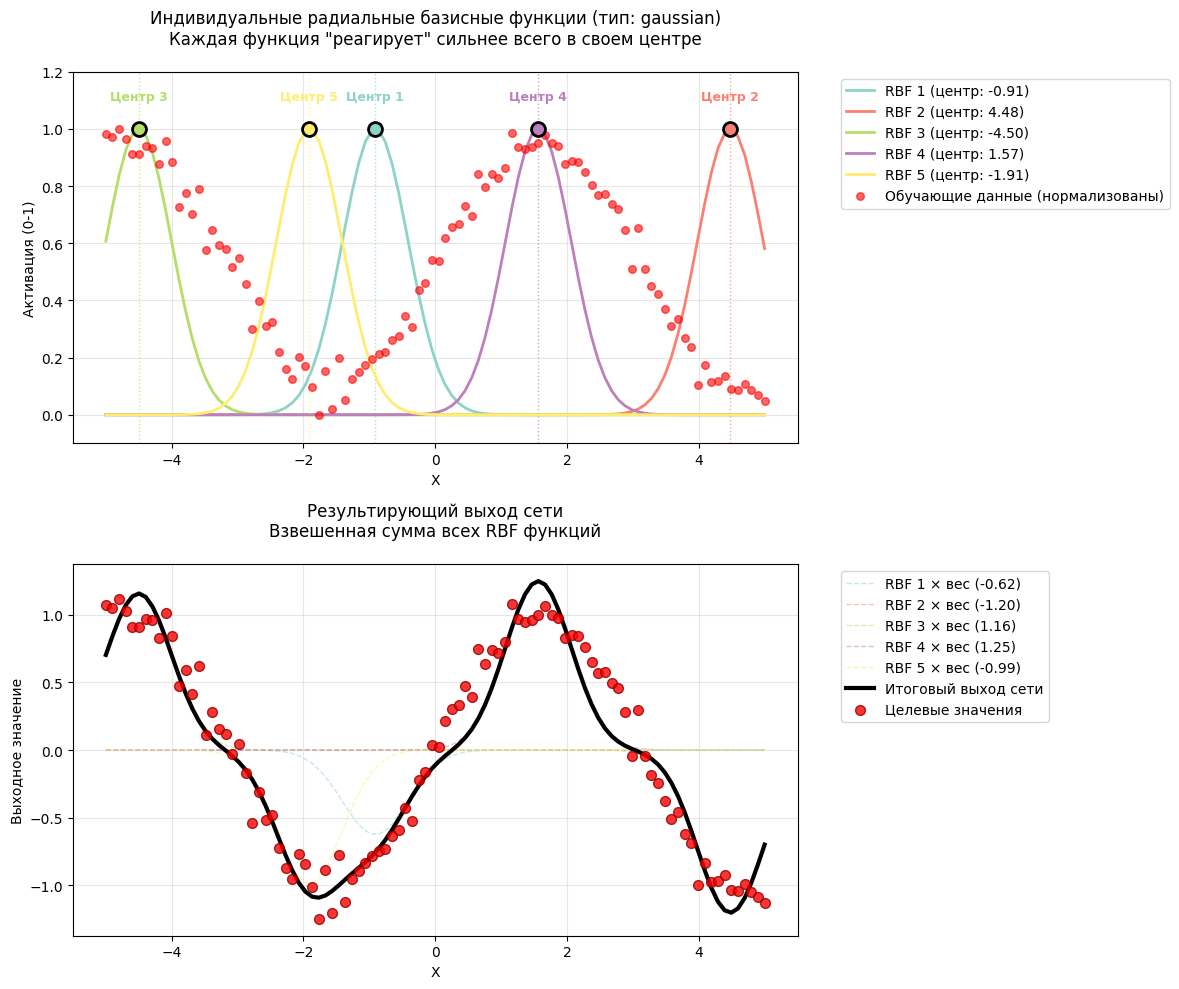


 ОБЪЯСНЕНИЕ ГРАФИКОВ:
 Тип RBF функции: gaussian
 Количество RBF нейронов: 5
 Параметр ширины (sigma): 0.5

 ВЕРХНИЙ ГРАФИК:
   • Показывает 5 индивидуальных RBF функций
   • Каждая функция имеет максимум в своем центре (отмечен точкой)
   • Функции 'откликаются' сильнее на данные рядом с их центрами

 НИЖНИЙ ГРАФИК:
   • Показывает, как RBF функции комбинируются в итоговый результат
   • Каждая RBF функция умножается на свой вес
   • Черная линия - итоговый выход сети (сумма всех взвешенных RBF)
   • Красные точки - данные, на которых обучалась сеть

 ЧАСТЬ 2: ДВУМЕРНЫЙ СЛУЧАЙ (2D)
----------------------------------------
Генерируем 2D данные для регрессии...
✓ Создано 200 точек данных
✓ Диапазон X1: от 0.51 до 99.66
✓ Диапазон X2: от 140.69 до 1743.04
✓ Диапазон Y: от 14.43 до 1651.60

Создаем 2D RBF-сеть...
✓ Конфигурация: 9 RBF-нейронов, sigma=0.5
Обучаем сеть на 2D данных...
✓ Обучение завершено!

 Центры RBF-функций в 2D пространстве:
   RBF 1: (47.697, 417.279)
   RBF 2: (51.63

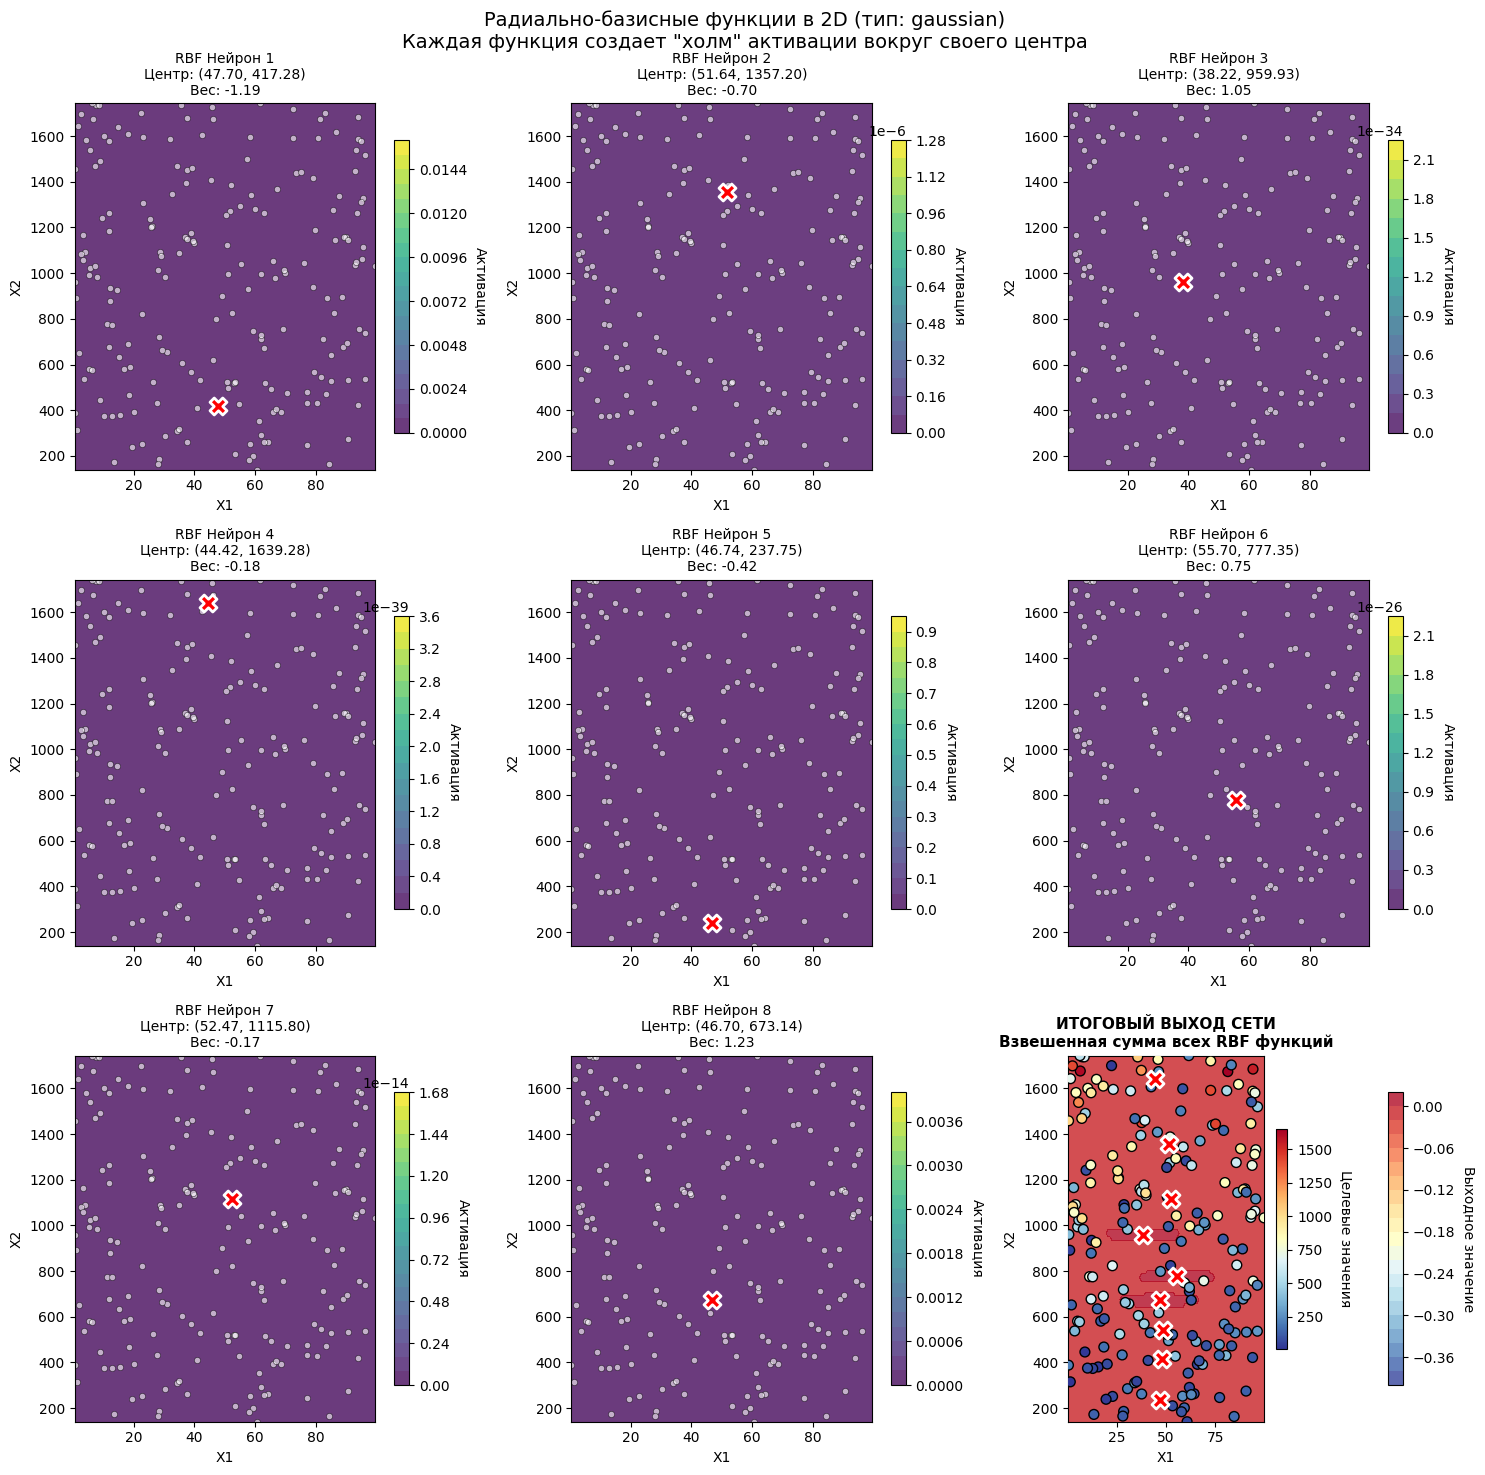


ОБЪЯСНЕНИЕ 2D ВИЗУАЛИЗАЦИИ:
Тип RBF функции: gaussian
Количество RBF нейронов: 9
Параметр ширины (sigma): 0.5

 ИНДИВИДУАЛЬНЫЕ RBF ФУНКЦИИ:
   • Каждый график показывает одну RBF функцию
   • Красный крест (X) - центр функции
   • Пунктирная окружность - область основного влияния
   • Цвет показывает силу активации (темнее = сильнее)
   • Белые точки - обучающие данные

 ИТОГОВЫЙ ВЫХОД:
   • Показывает результат работы всей сети
   • Комбинирует все RBF функции с их весами
   • Цветные точки - целевые значения данных для обучения

 ОБРАЗОВАТЕЛЬНЫЕ ВЫВОДЫ
----------------------------------------
 ЧТО МЫ УЗНАЛИ:
   1. RBF-функции создают 'области влияния' вокруг своих центров
   2. Каждая функция максимально активна в своем центре
   3. Итоговый результат = сумма всех RBF × их веса
   4. В 2D случае RBF создают 'холмы' активации
   5. Сеть автоматически выбирает центры и веса при обучении

 ПРИНЦИП РАБОТЫ:
   • Новая точка данных 'активирует' ближайшие RBF-функции
   • Чем ближе точка к

In [181]:
def main():
    """
    Главная функция для запуска демонстраций
    """
    print("==== Демонстрация работы радиально-базисных нейронных сетей ====")

    # Выберите демонстрации для запуска
    print("\nДоступные демонстрации:")
    print("1. Базовая демонстрация формирования RBF функций")
    print("2. Визуализация процесса обучения")
    print("3. Визуализация процесса обучения - интерактив")
    print("4. Эксперименты с количеством нейронов и шириной функций")
    print("5. Сравнение результатов на разных наборах данных")
    print("6. Расширенные эксперименты на сложных функциях")
    print("7. Сравнение различных типов радиальных базисных функций")

    try:
        choice = int(input("\nВыберите демонстрацию (введите число от 1 до 7): "))

        if choice == 1:
            print("\n--- БАЗОВАЯ ДЕМОНСТРАЦИЯ ФОРМИРОВАНИЯ RBF ФУНКЦИЙ ---")
            print("Показывает основные принципы построения радиально-базисных функций")
            print("Демонстрирует расположение центров и форму активационных функций")
            demo_rbf_formation()
        elif choice == 2:
            print("\n--- ВИЗУАЛИЗАЦИЯ ПРОЦЕССА ОБУЧЕНИЯ ---")
            print("Показывает пошаговое обучение РБНС и изменение весов")
            print("Демонстрирует, как сеть постепенно приближает целевую функцию")
            demo_training_process()
        elif choice == 3:
            print("\n--- ИНТЕРАКТИВНАЯ ВИЗУАЛИЗАЦИЯ ОБУЧЕНИЯ ---")
            print("Позволяет управлять процессом обучения в реальном времени")
            print("Показывает динамические изменения аппроксимации на каждом шаге")
            demo_training_process_interactive()
        elif choice == 4:
            print("\n--- ЭКСПЕРИМЕНТЫ С ПАРАМЕТРАМИ СЕТИ ---")
            print("Исследует влияние количества нейронов и ширины функций на качество")
            print("Демонстрирует оптимальный выбор архитектуры РБНС")
            demo_experiment_neurons_width()
        elif choice == 5:
            print("\n--- СРАВНЕНИЕ НА РАЗНЫХ НАБОРАХ ДАННЫХ ---")
            print("Показывает работу РБНС на различных типах функций и задач")
            print("Демонстрирует универсальность и ограничения метода")
            demo_dataset_comparison()
        elif choice == 6:
            print("\n--- РАСШИРЕННЫЕ ЭКСПЕРИМЕНТЫ ---")
            print("Тестирует РБНС на сложных многомерных и нелинейных функциях")
            print("Показывает возможности аппроксимации комплексных зависимостей")
            demo_advanced_experiments()
        elif choice == 7:
            print("\n--- ТЕОРЕТИЧЕСКОЕ СРАВНЕНИЕ RBF ФУНКЦИЙ ---")
            print("Показывает математические свойства и формы различных RBF функций")
            print("Каждая функция определяет, как нейрон реагирует на расстояние от центра")
            demonstrate_rbf_types()
        else:
            print("Некорректный выбор. Пожалуйста, введите число от 1 до 7.")
    except ValueError:
        print("Пожалуйста, введите целое число от 1 до 7.")

if __name__ == "__main__":
    main()